In [1]:
from railroad import load_graph, save_graph
import matplotlib.pyplot as plt
import json
from scipy.signal import find_peaks
import numpy as np
import pandas as pd

from scipy.ndimage import gaussian_filter1d
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

from railroad import CustomJSONEncoder

In [2]:
G = load_graph('../data/railroad_with_scores.json')

In [3]:
# 1848219055 -> 602729079
G.nodes[1848219055]

{'street_count': 3,
 'geometry': <POINT (-21.81 64.086)>,
 'year': 2025,
 'is_station': True}

In [4]:
def add_stops(distances, scores, min_distance=0.3, score_threshold=1.0, min_length=0.6, sigma=0.1, ax=None):
    if max(distances) < min_length:
        print('Too short')
        return []

    smoothed_scores = gaussian_filter1d(scores, sigma=sigma)

    # Find internal peaks above threshold
    peaks, _ = find_peaks(smoothed_scores, height=score_threshold)
    candidate_stops = [(distances[p], smoothed_scores[p]) for p in peaks]

    filtered_stops = [p for p in candidate_stops if p[1] > score_threshold and p[0]
                      > min_distance and p[0] < max(distances) - min_distance]

    # Filter stops to ensure minimum distance between them and maximize score
    if not filtered_stops:
        print("No valid stops found.")
        return []

    # Sort by score in descending order for greedy selection
    filtered_stops.sort(key=lambda x: x[1], reverse=True)
    final_stops = []

    for stop in filtered_stops:
        # Check if this stop is far enough from already selected stops
        if all(abs(stop[0] - s[0]) >= min_distance for s in final_stops):
            final_stops.append(stop)
    final_stops.sort(key=lambda x: x[0])

    # Plot original and smoothed data
    ax.plot(distances, scores, label="Original Data", alpha=0.6)
    ax.plot(distances, smoothed_scores, label="Smoothed Data", color="red")
    ax.scatter([p[0] for p in candidate_stops], [
               p[1] for p in candidate_stops], color="red", marker='x', label="Candidate Stops")
    ax.scatter([p[0] for p in final_stops], [p[1]
               for p in final_stops], color="blue", marker='s', label="Final Stops")
    ax.set_title("Passenger Scores")
    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("Score")
    ax.legend()
    ax.grid(True)

    return final_stops

In [5]:
# 1848219055 -> 602729079

print(G.get_edge_data(1848219055, 602729079))
print(G.get_edge_data(602729079, 1848219055))
print(G.get_edge_data(602729079, 1848219055)['geometry'])

{'name': 'Arnarnesvegur-Salavegur-Kóratorg-Rjúpnavegur-Arnarnesvegur-Rjúpnavegur-Vatnsendavegur-Elliðatorg-Vallatorg-Baugatorg-Elliðahvammsvegur-Þingtorg', 'year': 2025, 'length': 4.118939154012401, 'geometry': <LINESTRING (-21.81 64.086, -21.81 64.086, -21.81 64.086, -21.81 64.086, -21...>, 'origin_node': 1848219055, 'score_data': [{'distance_from_start': 0, 'coordinate': (-21.8096127, 64.0856269), 'interpolation_value': 0.0, 'scores': {'poi_score': 0.0, 'population_score_2025': 0.15161127225998877, 'population_score_2029': 0.15533023375863877, 'population_score_2030': 0.15924289116867682, 'final_score': 0.4661843971873044, 'parking_score': 0.0}}, {'distance_from_start': 0.05, 'coordinate': (-21.809647990472644, 64.08607605646375), 'interpolation_value': 0.012139047975810294, 'scores': {'poi_score': 0.0, 'population_score_2025': 0.11301965017755874, 'population_score_2029': 0.11331567641315113, 'population_score_2030': 0.11362712068184722, 'final_score': 0.3399624472725571, 'parking_s

Processing edge 1848219055 -> 602729079
Processing edge 602729079 -> 111465687
Processing edge 111465687 -> 2320789566
Too short
Processing edge 2320789566 -> 2320771865
Too short
Processing edge 2320789566 -> 1201238829
Processing edge 2320771865 -> 2328470640
No valid stops found.
Processing edge 2328470640 -> 1889922204
Processing edge 1889922204 -> 1896201758
Too short
Processing edge 1889922204 -> 10789575590
Too short
Processing edge 1896201758 -> 35786592
Processing edge 1896201758 -> 470330027
Too short
Processing edge 470330027 -> 384966546
Too short
Processing edge 384966546 -> 10789575590
Too short
Processing edge 384966546 -> 534441279
Too short
Processing edge 534441279 -> 11142383860
Processing edge 11142383860 -> 12339218091
Too short
Processing edge 12339218091 -> 323282788
Too short
Processing edge 323282788 -> 633181059
Too short
Processing edge 633181059 -> 633181062
Too short
Processing edge 633181059 -> 35786587
Processing edge 633181062 -> 1064270444
Too short
Pro

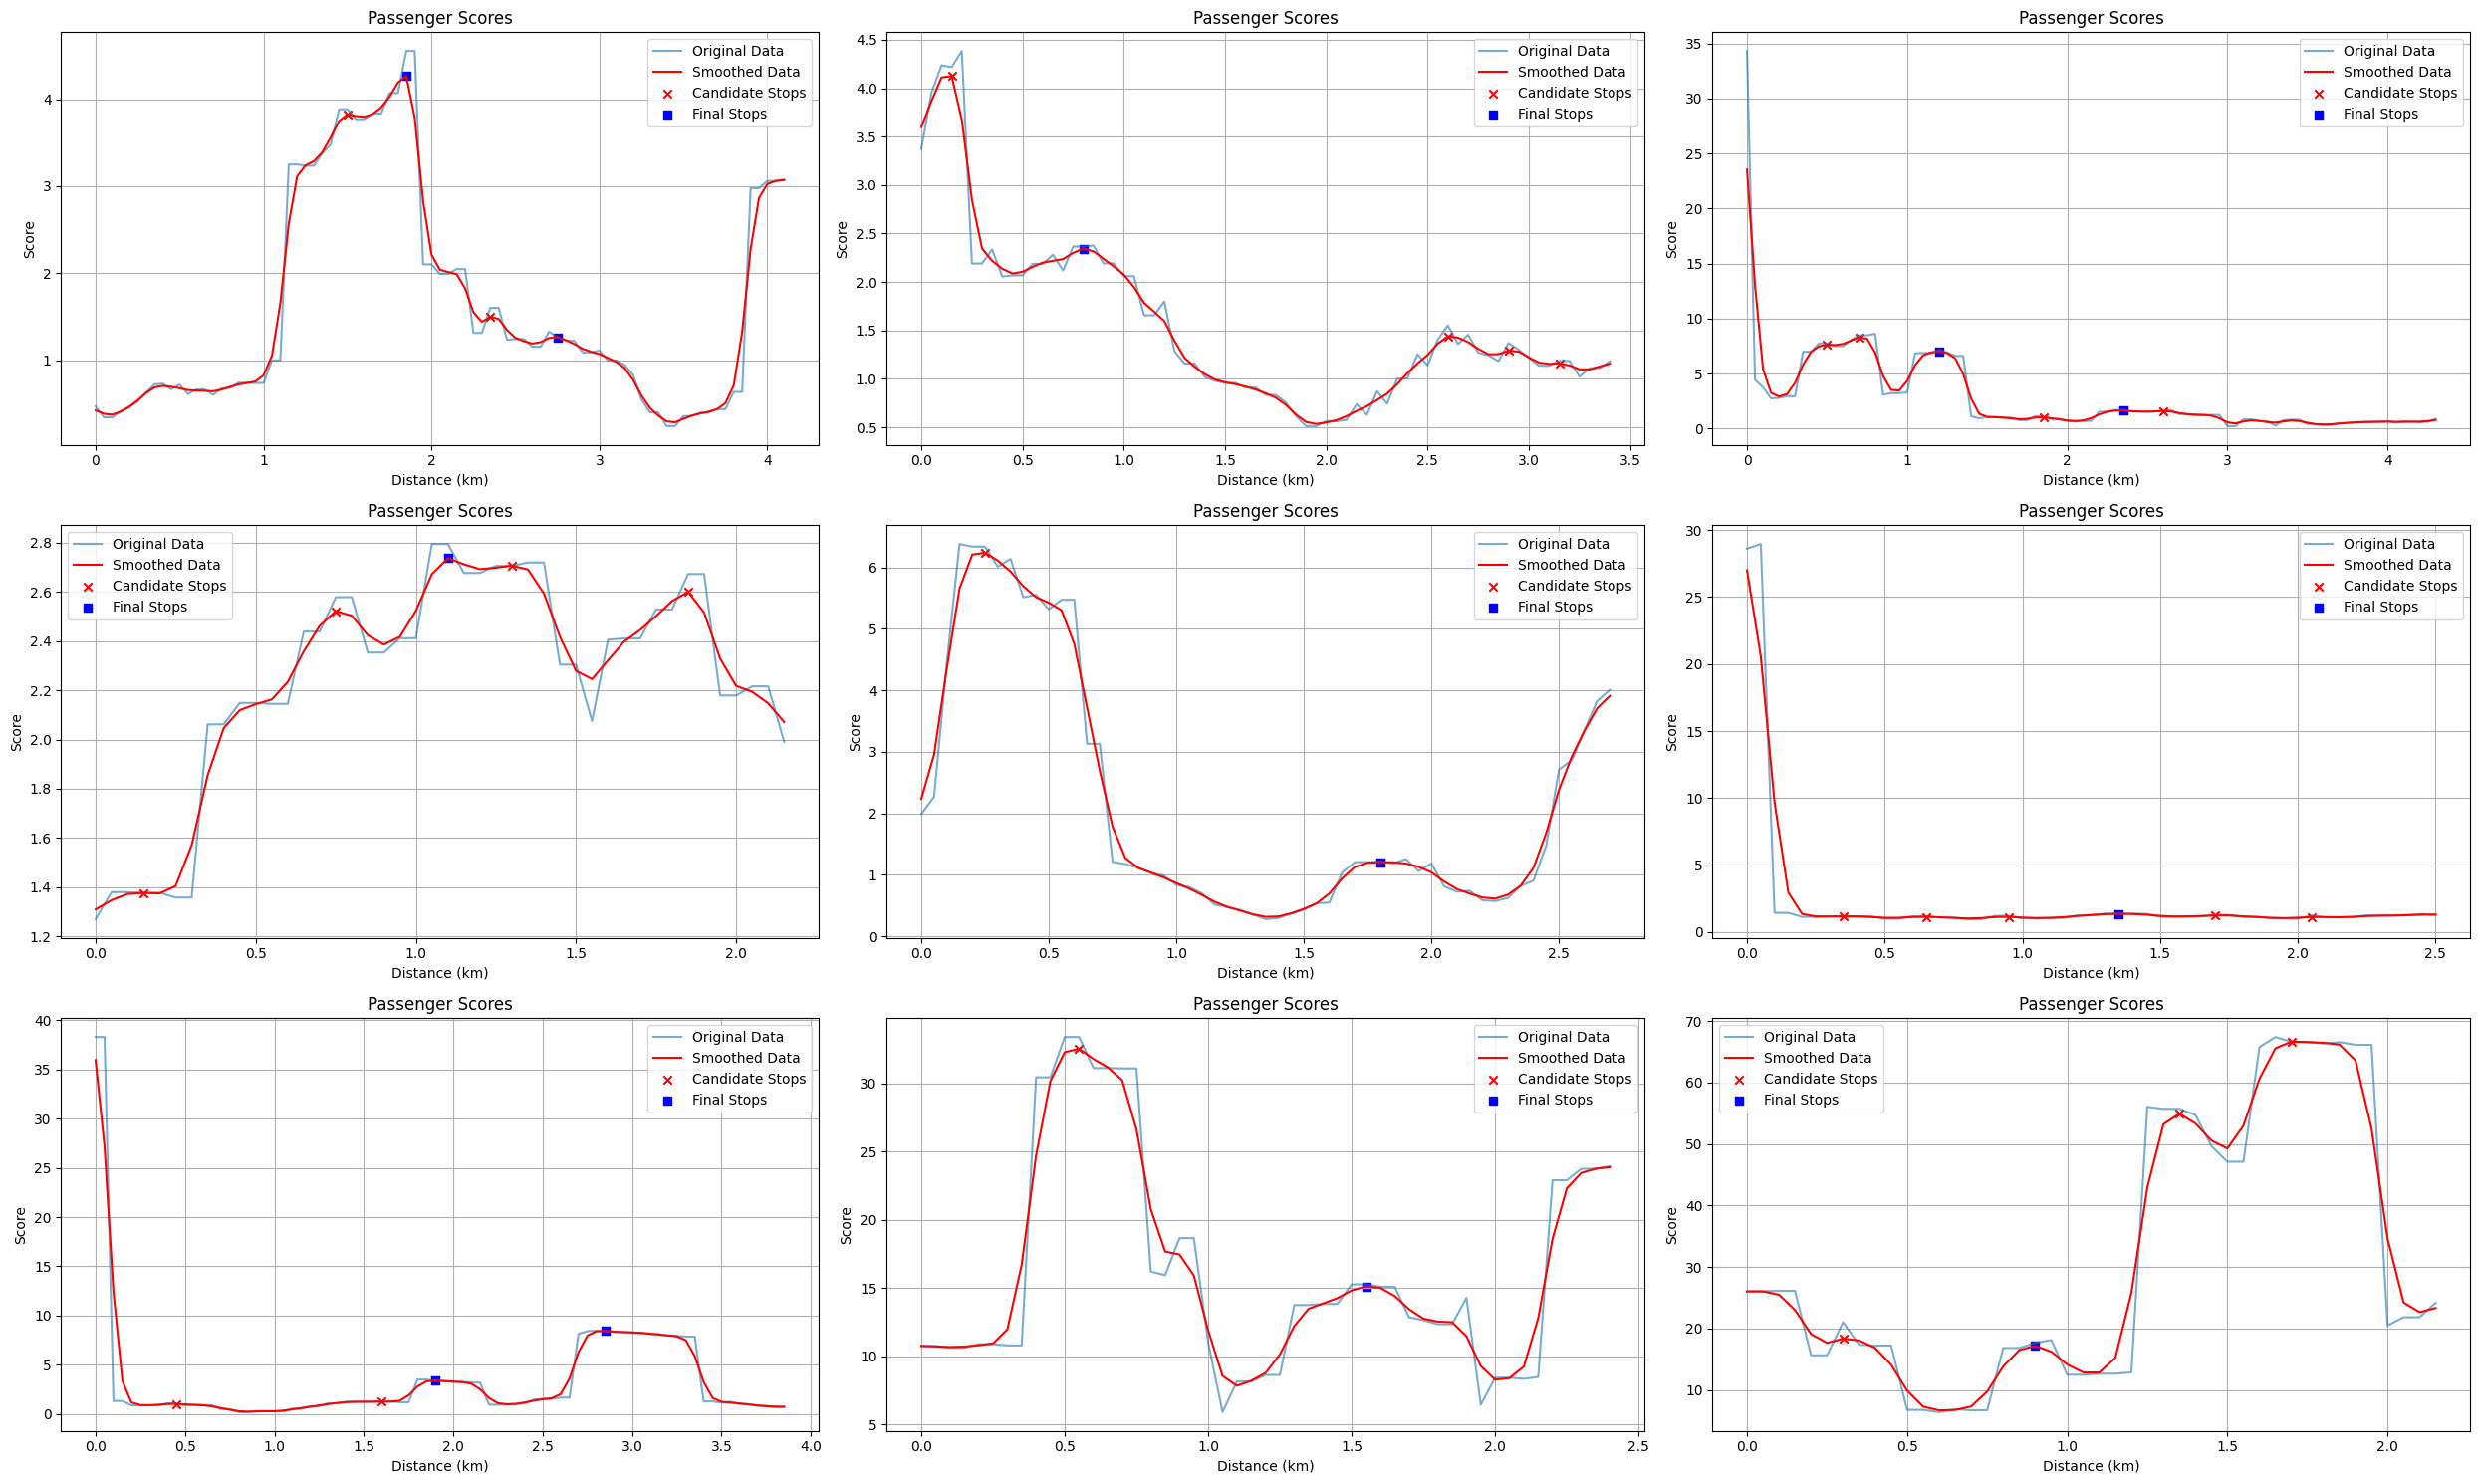

Processing edge 12339218093 -> 34512506
Too short


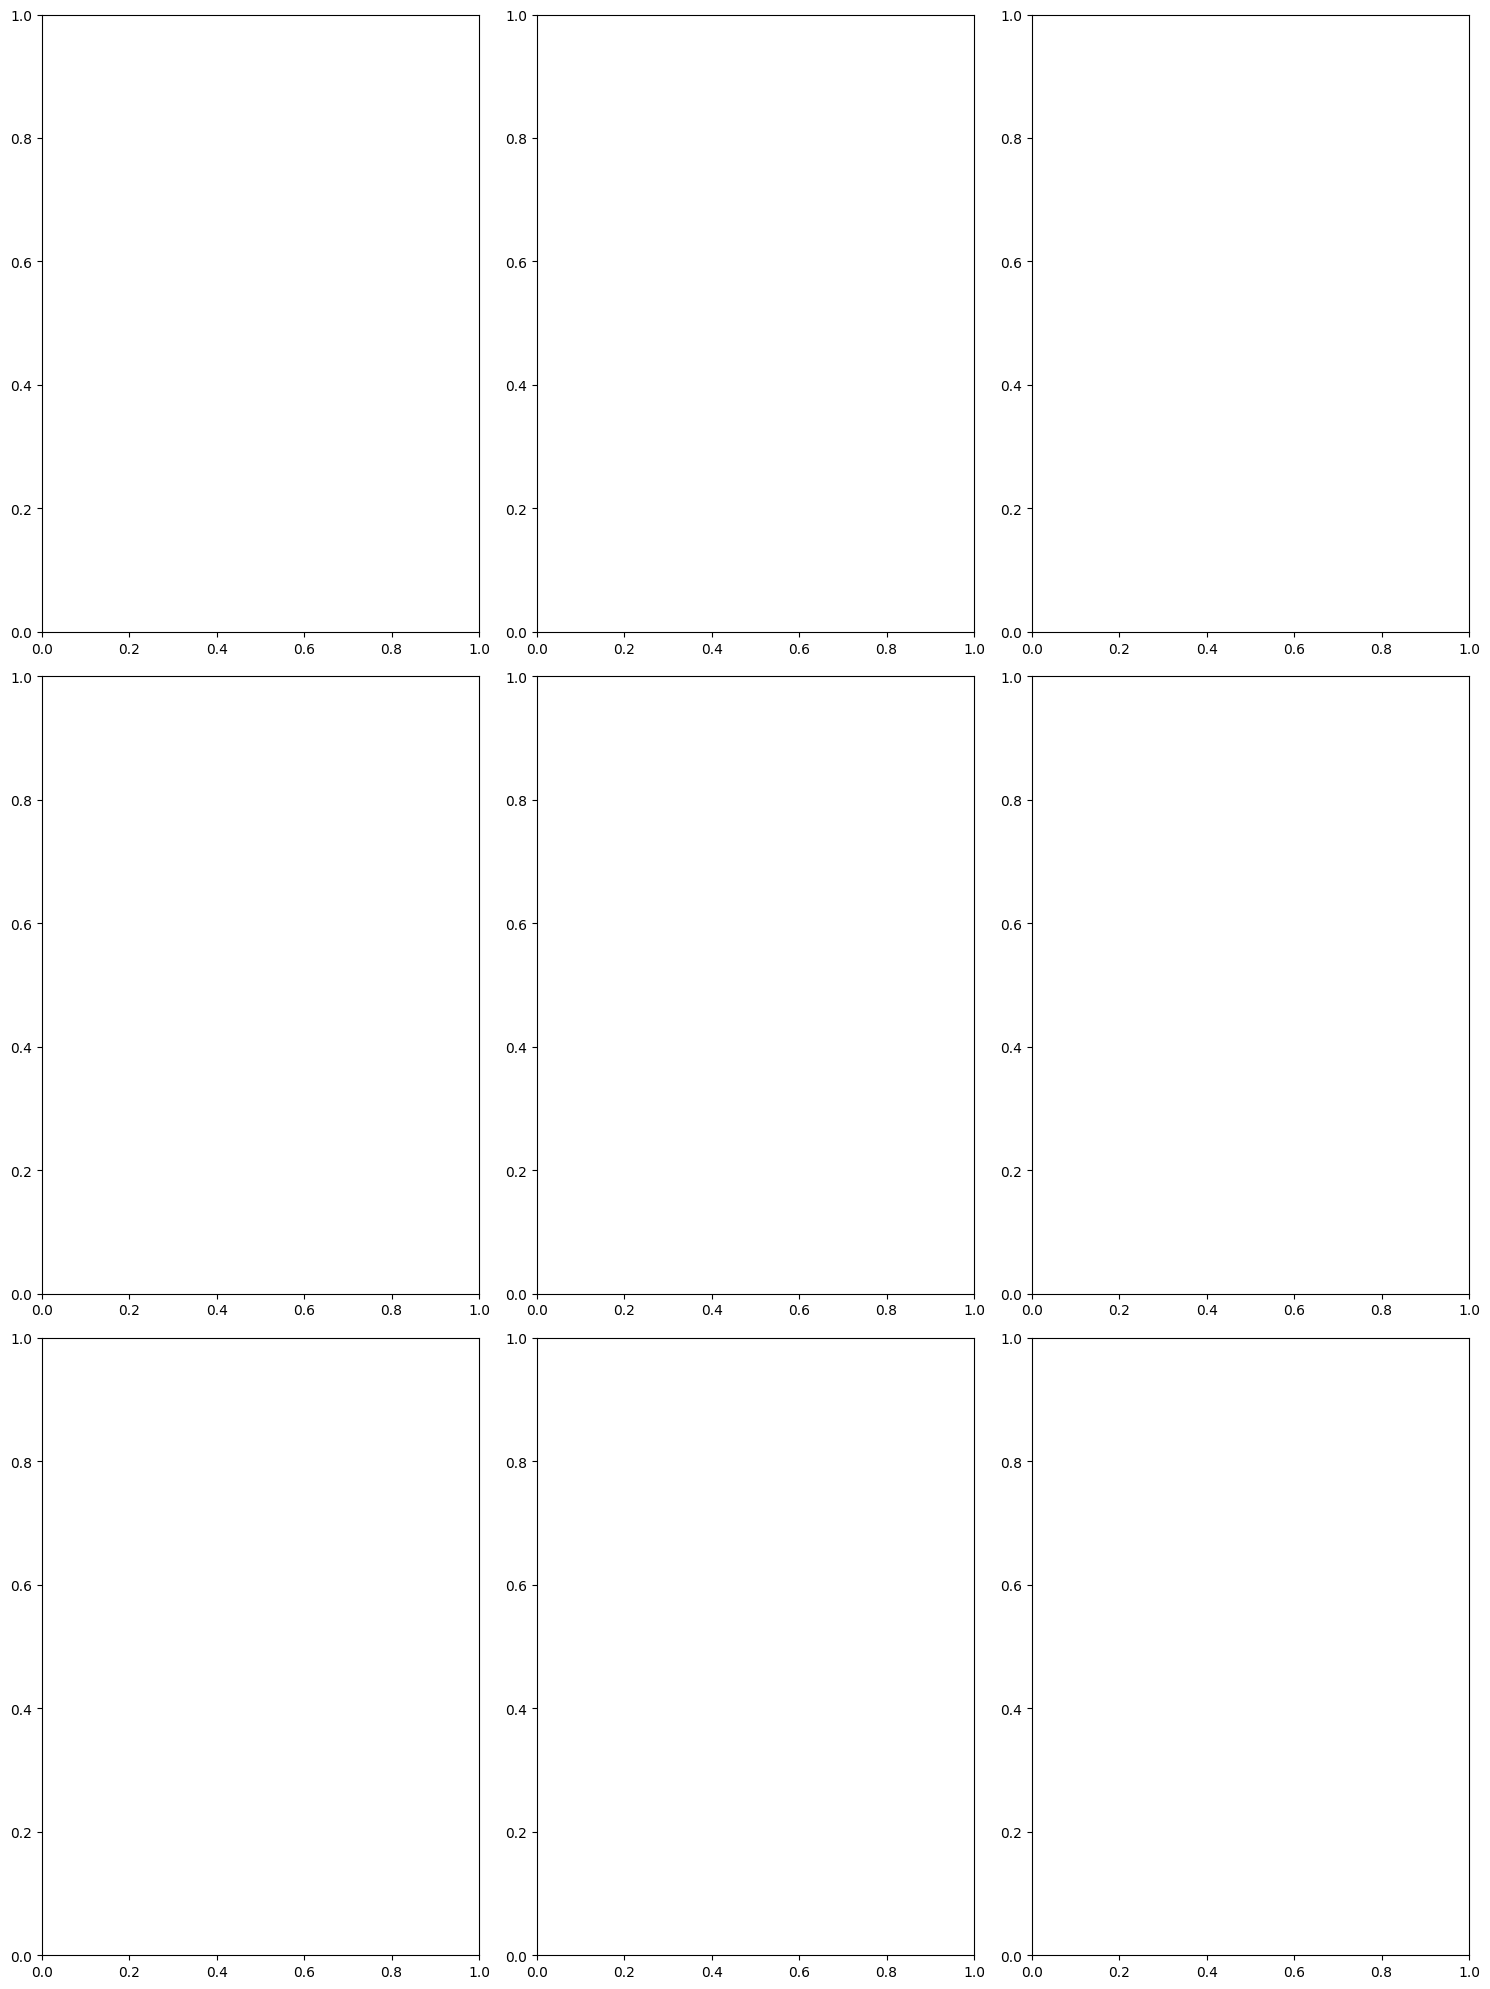

Processing edge 34512506 -> 5048627590
Too short


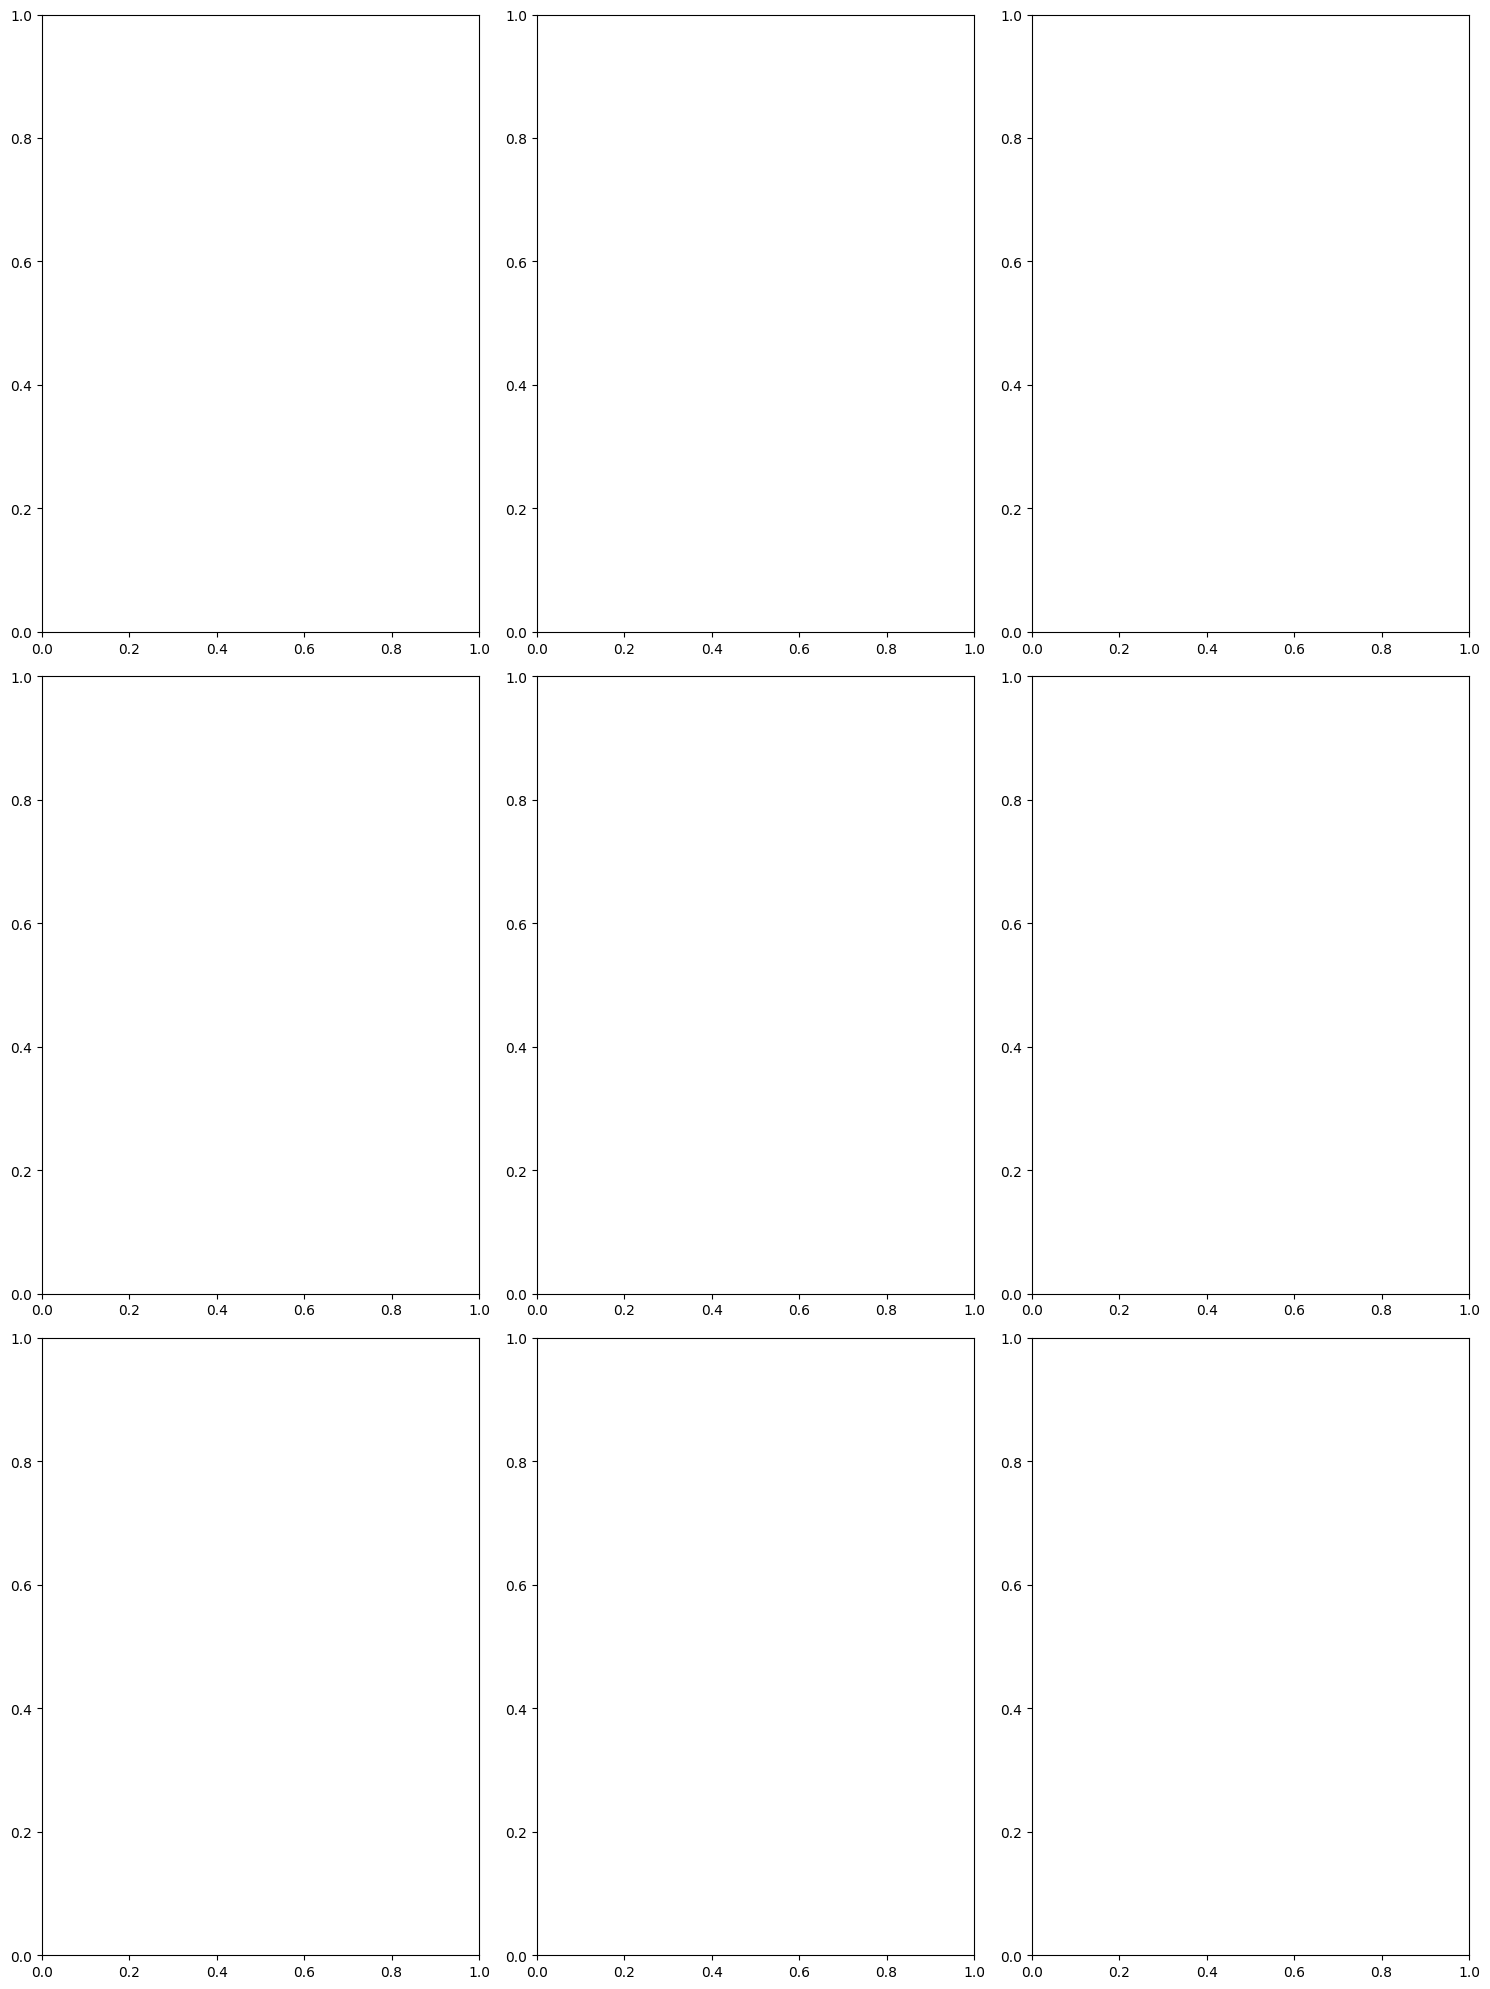

Processing edge 34512506 -> 1232404889
Too short


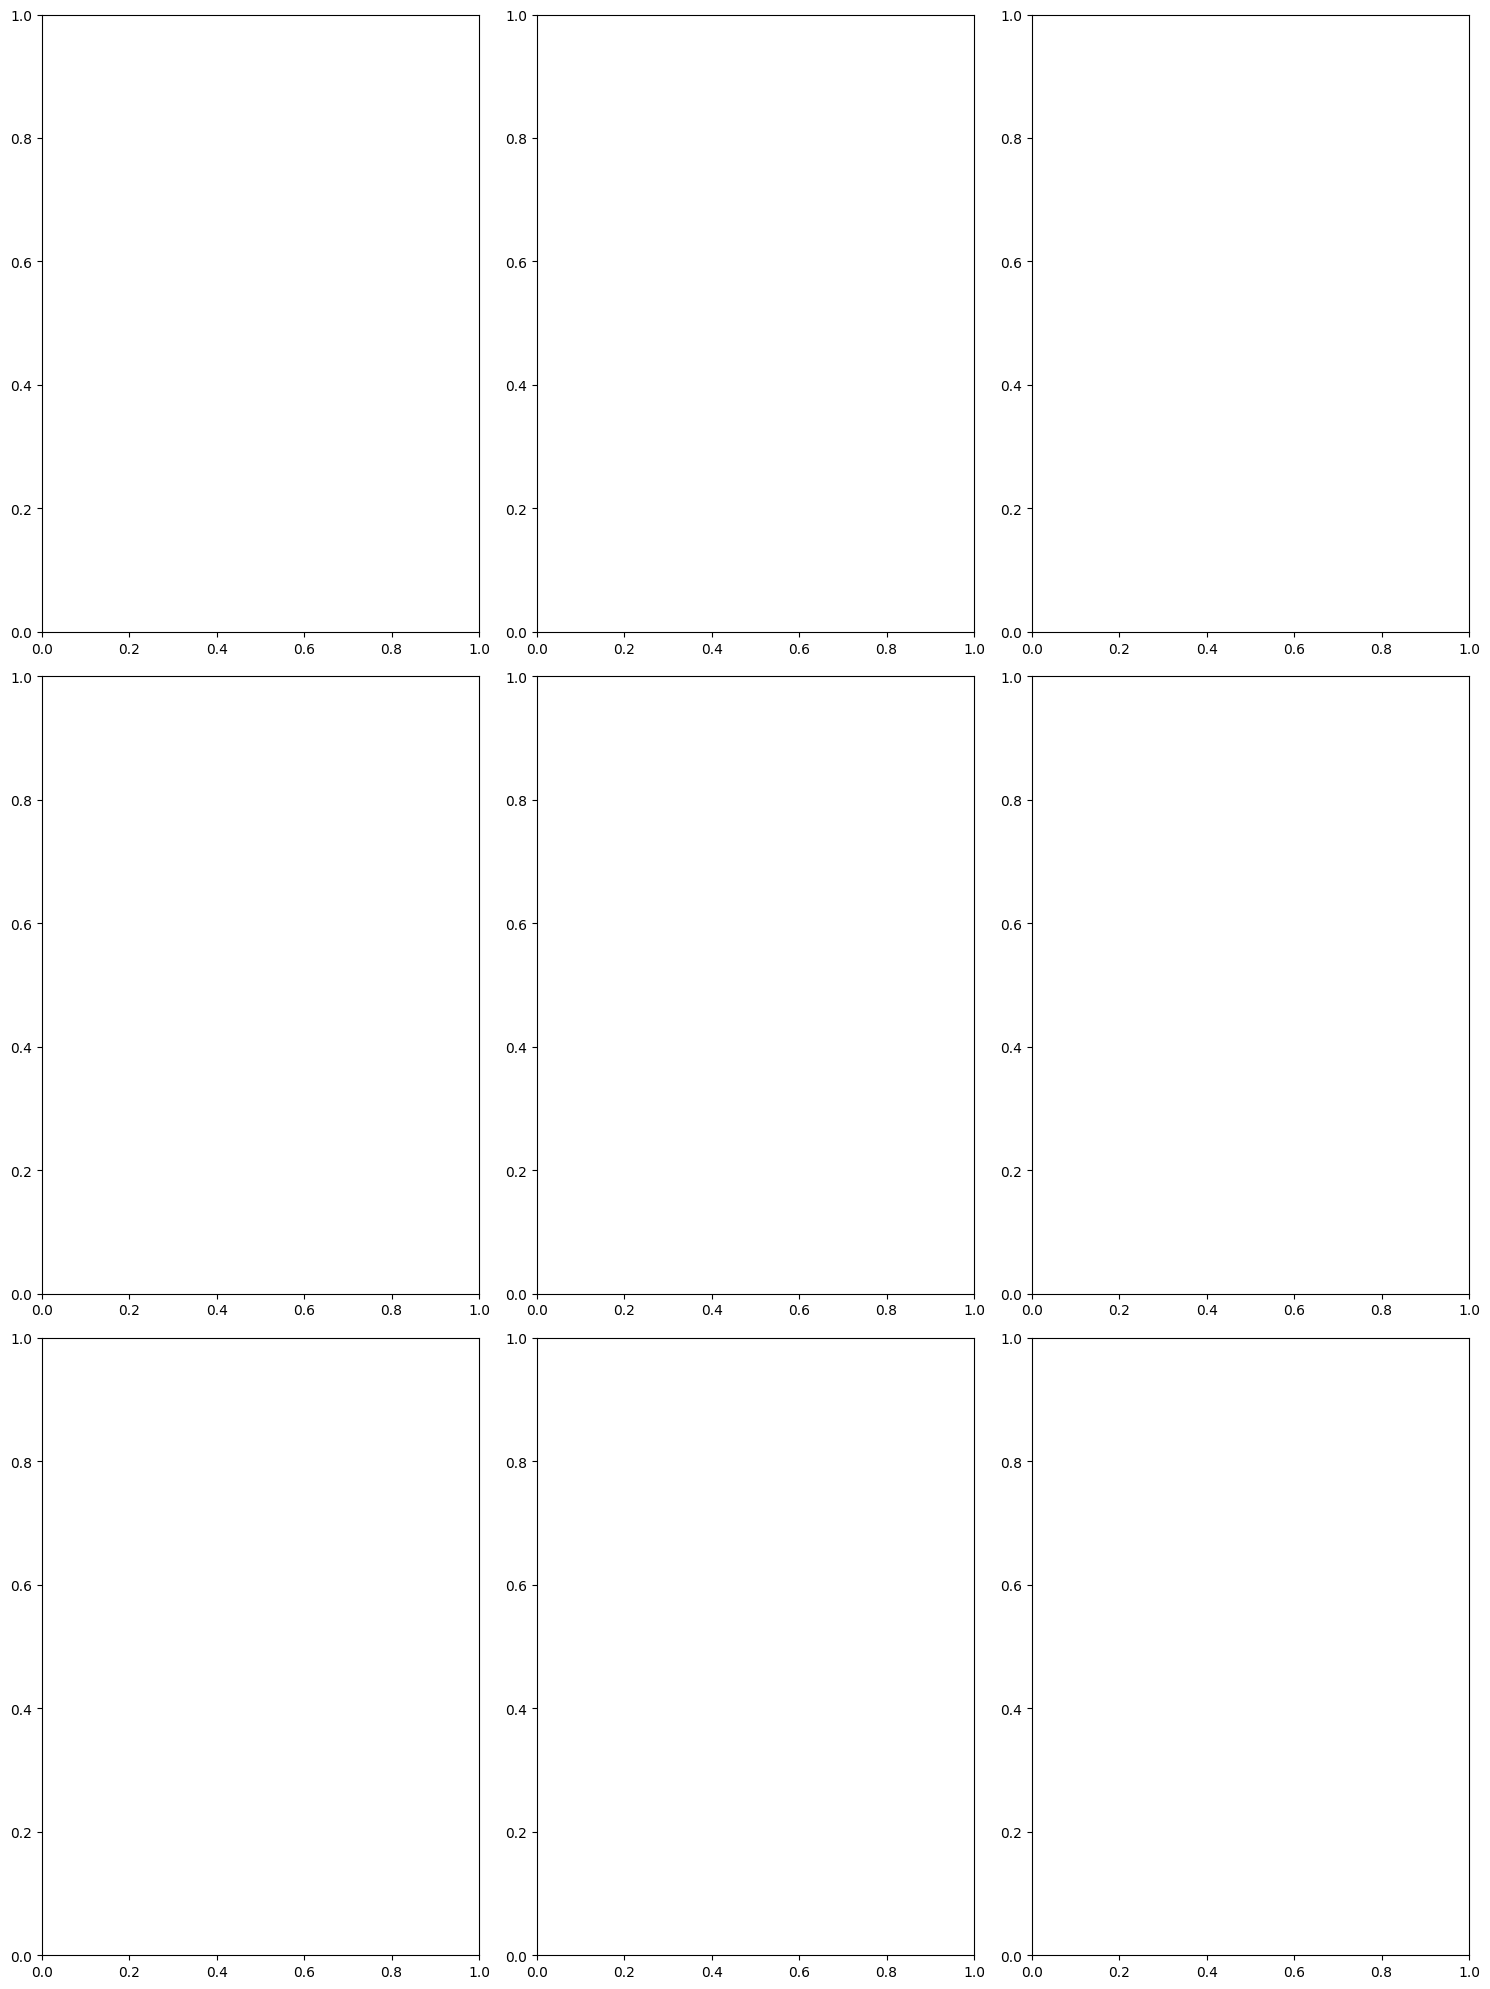

Processing edge 1232404889 -> 35786587
Too short


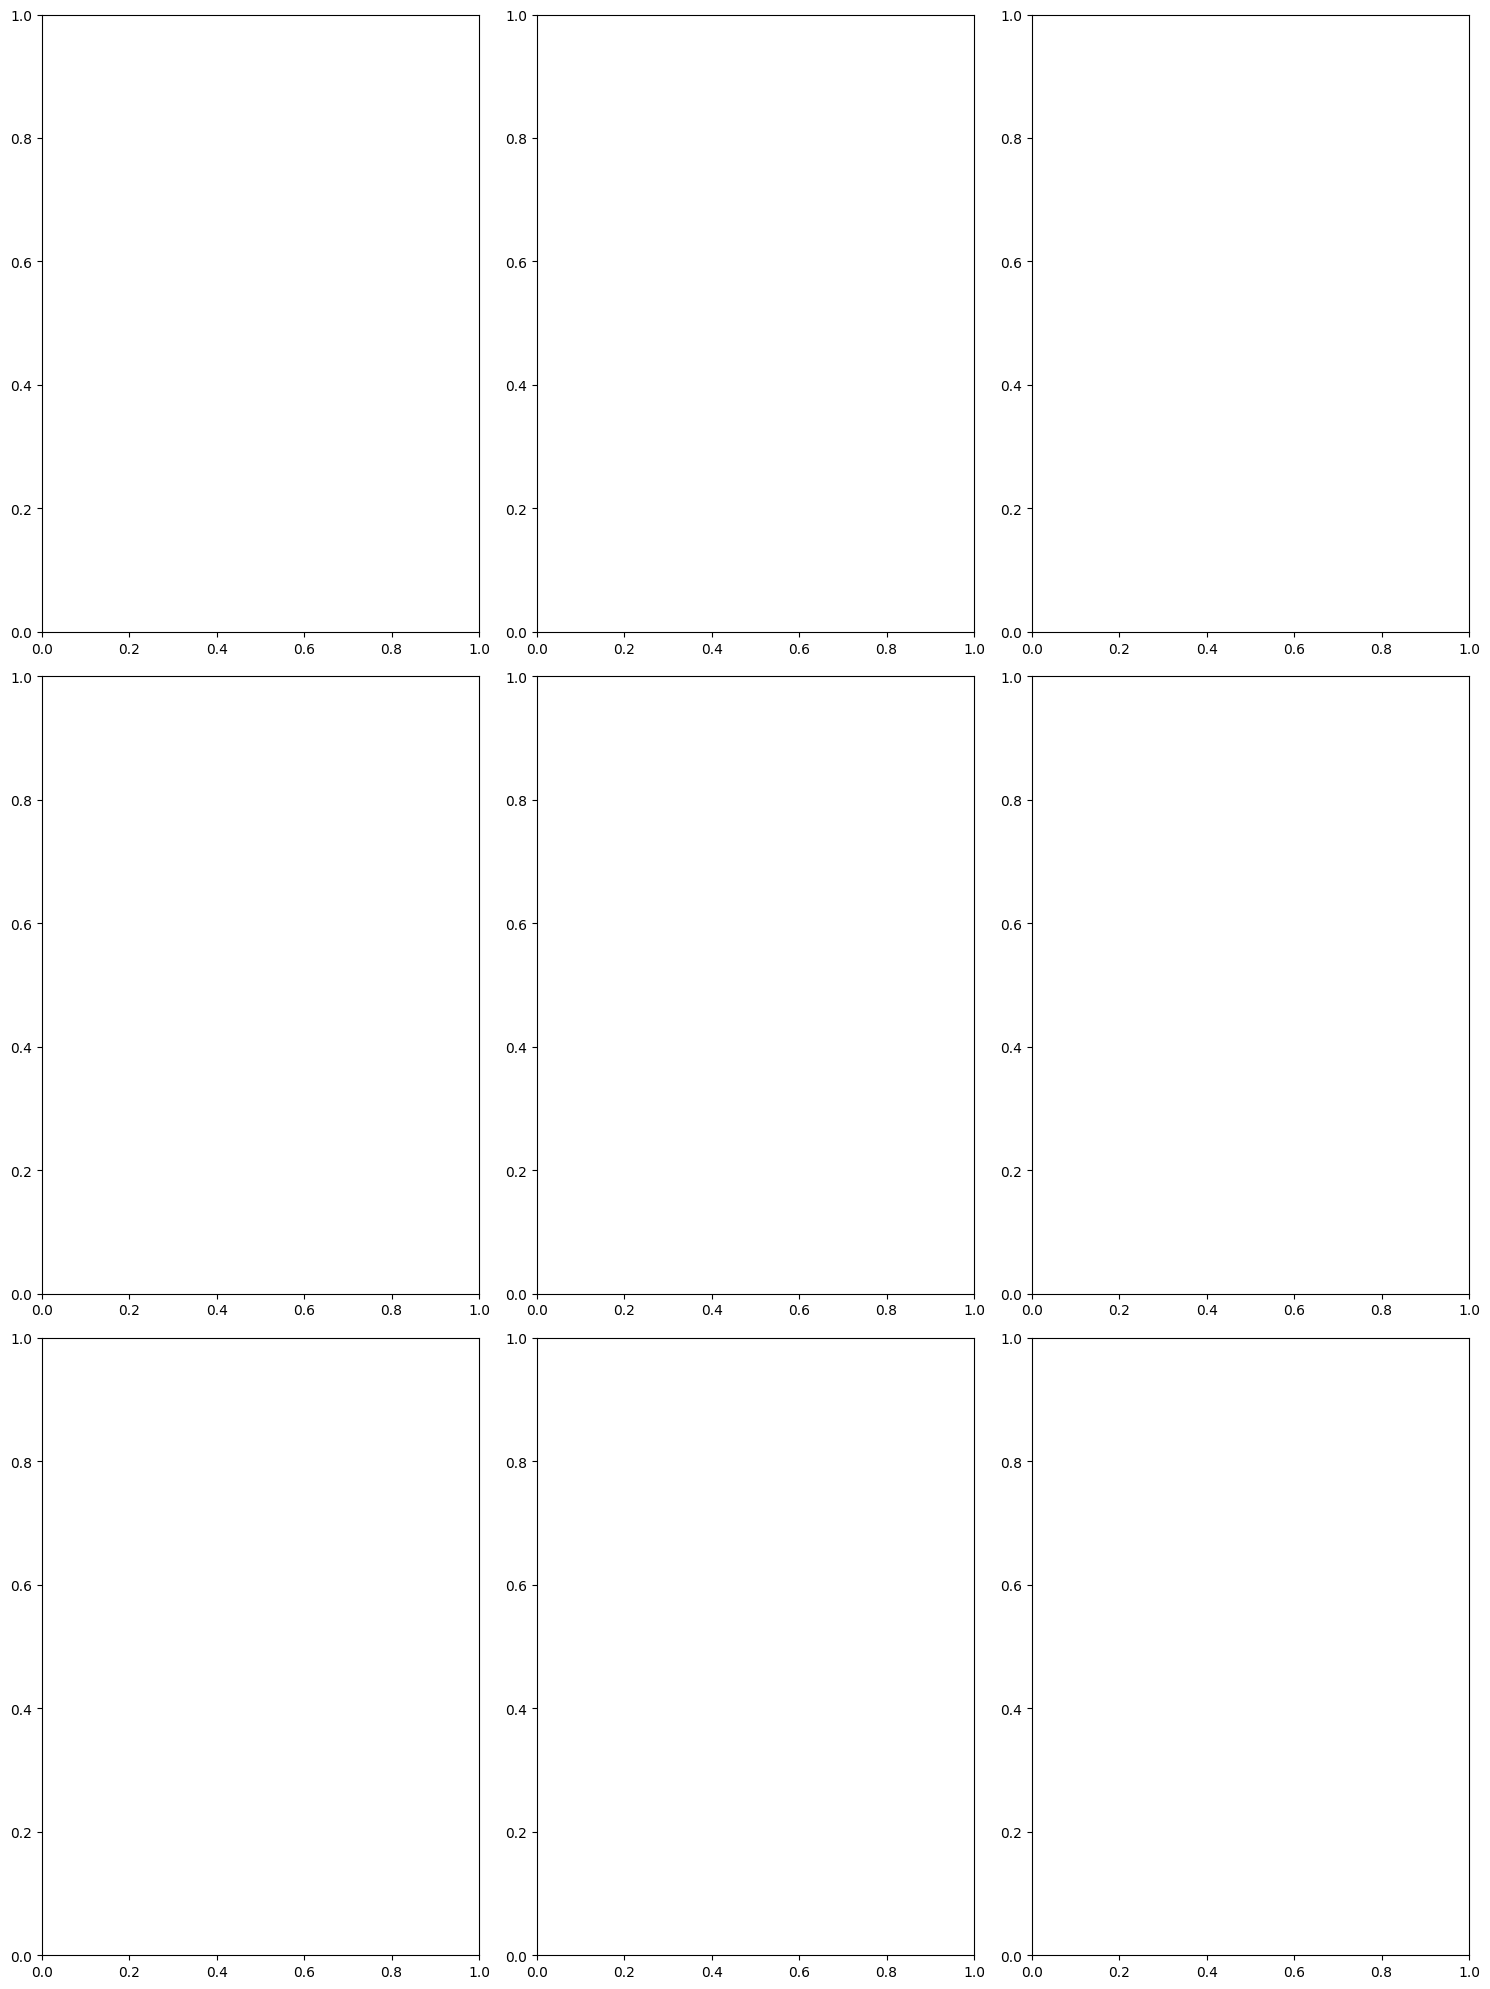

Processing edge 1232404889 -> 5902567606
Too short


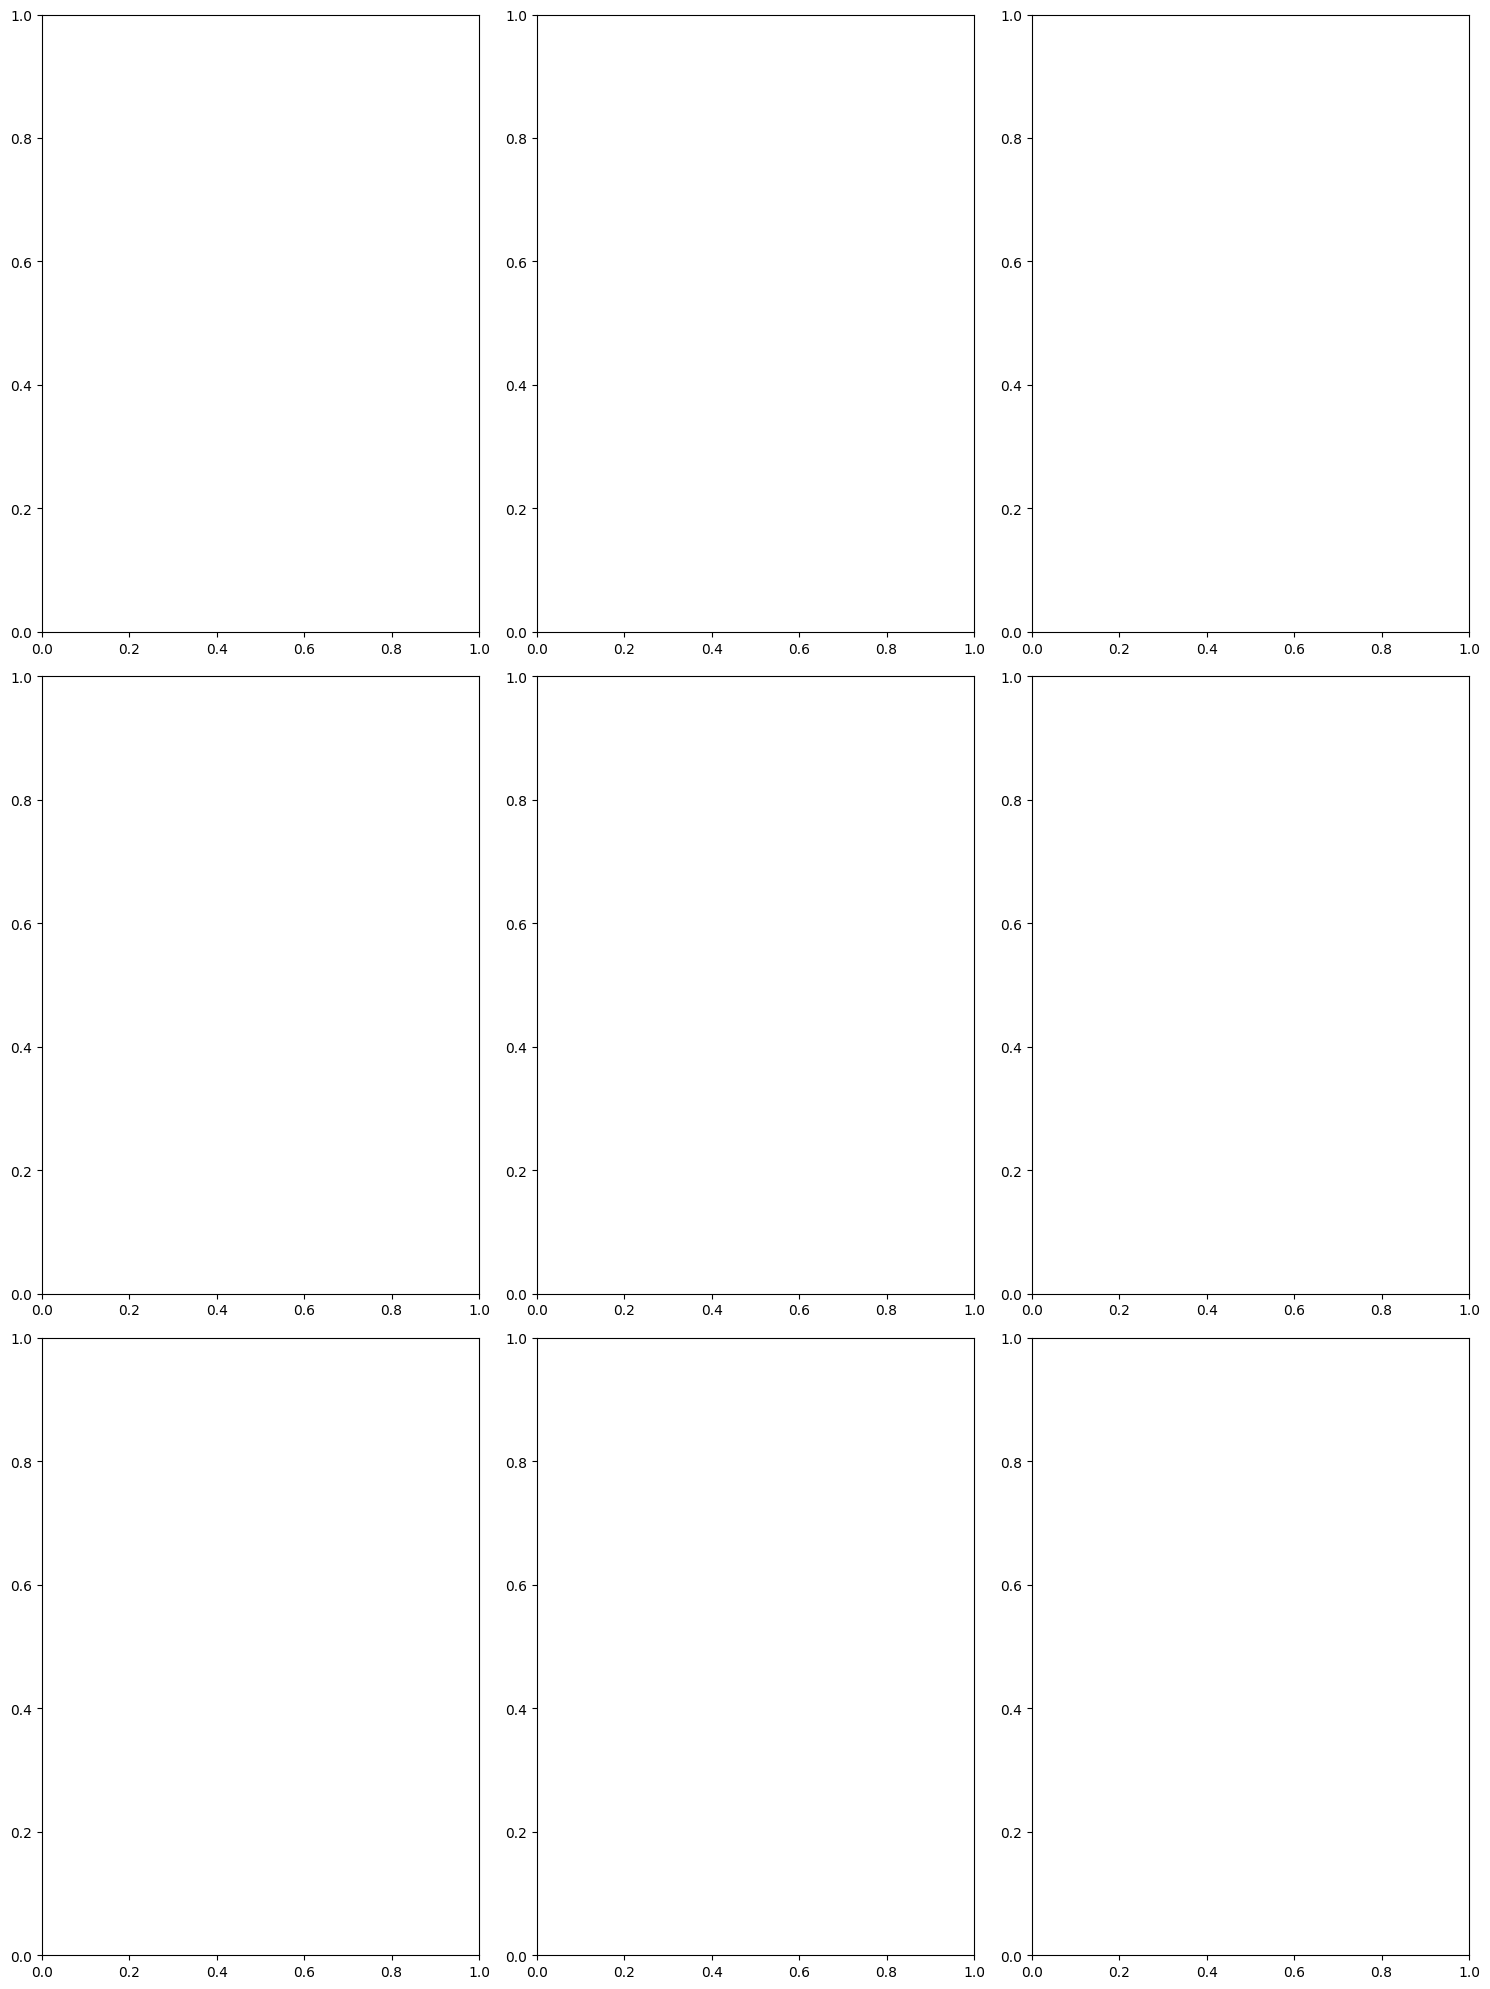

Processing edge 5902567606 -> 1229320617
Processing edge 35786587 -> 27237169
Processing edge 35786587 -> 35786592
Too short
Processing edge 1229320617 -> 36156319
Too short
Processing edge 36156319 -> 1344359843
Too short
Processing edge 36156319 -> 34186922
Too short
Processing edge 1344359843 -> 87135172
Too short
Processing edge 87135172 -> 87132867
No valid stops found.
Processing edge 87132867 -> 1208295444
Too short
Processing edge 1208295444 -> 1014129863
Too short
Processing edge 1208295444 -> 59981798
Processing edge 59981798 -> 1206684191
Processing edge 14587161 -> 1445535410
Processing edge 1445535410 -> 137868463
Processing edge 137868463 -> 6287414304
Too short
Processing edge 6287414304 -> 5007537719
Processing edge 6287414304 -> 10789575590
No valid stops found.
Processing edge 26471908 -> 26471976
Processing edge 26471976 -> 470330429
Too short
Processing edge 470330429 -> 26478210
Too short
Processing edge 406311222 -> 1201099500


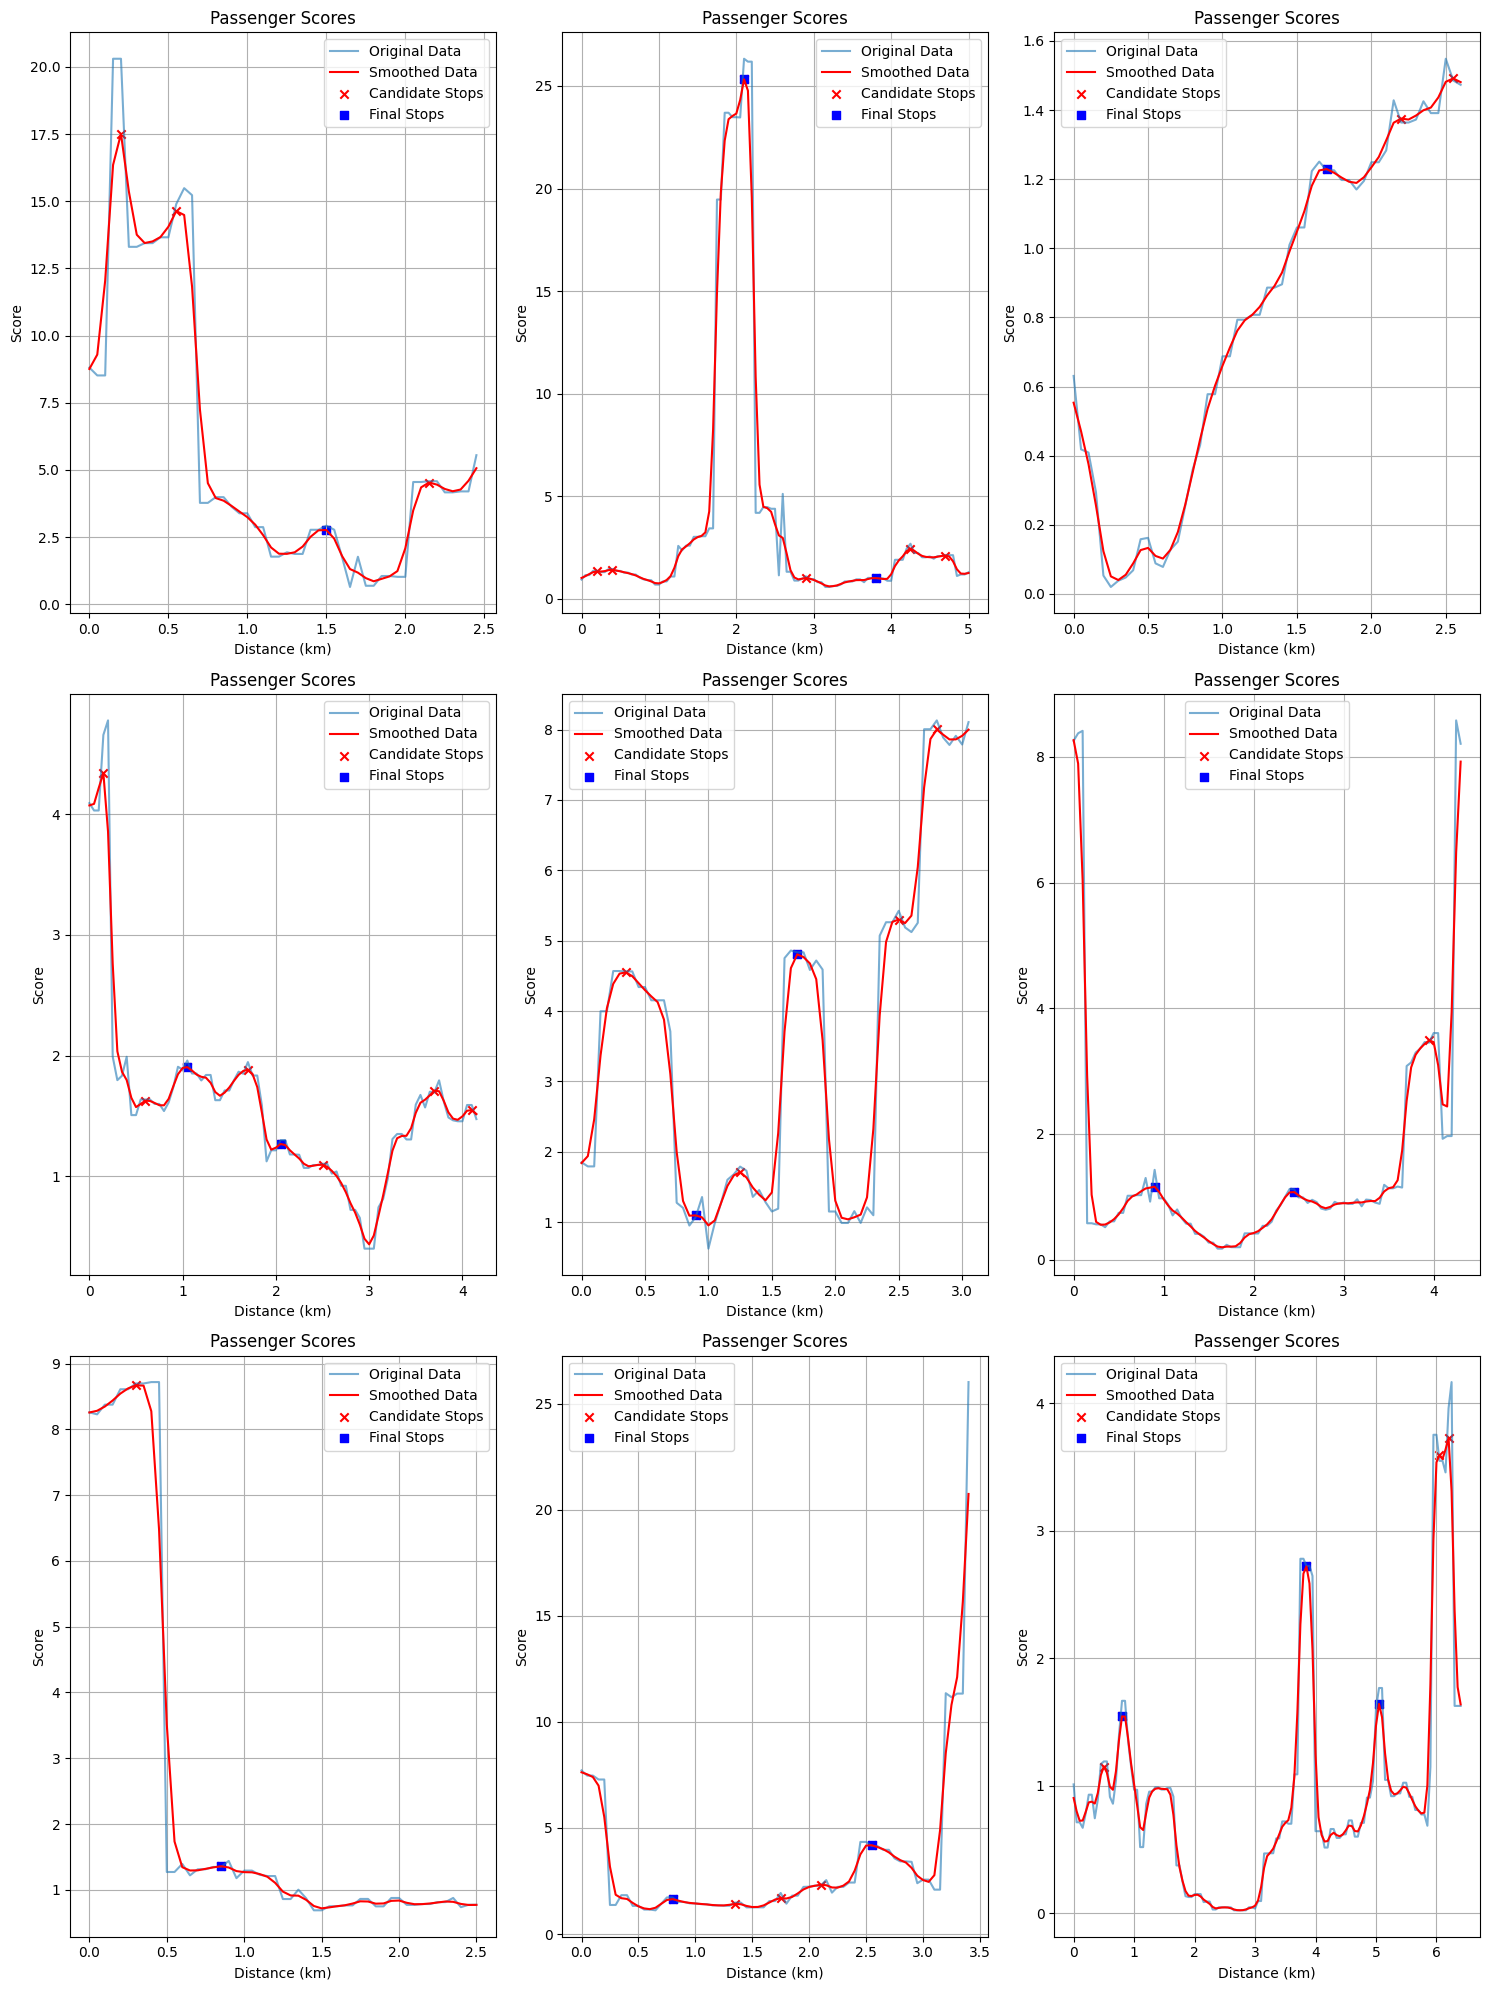

Processing edge 1201099500 -> 1201238829
No valid stops found.


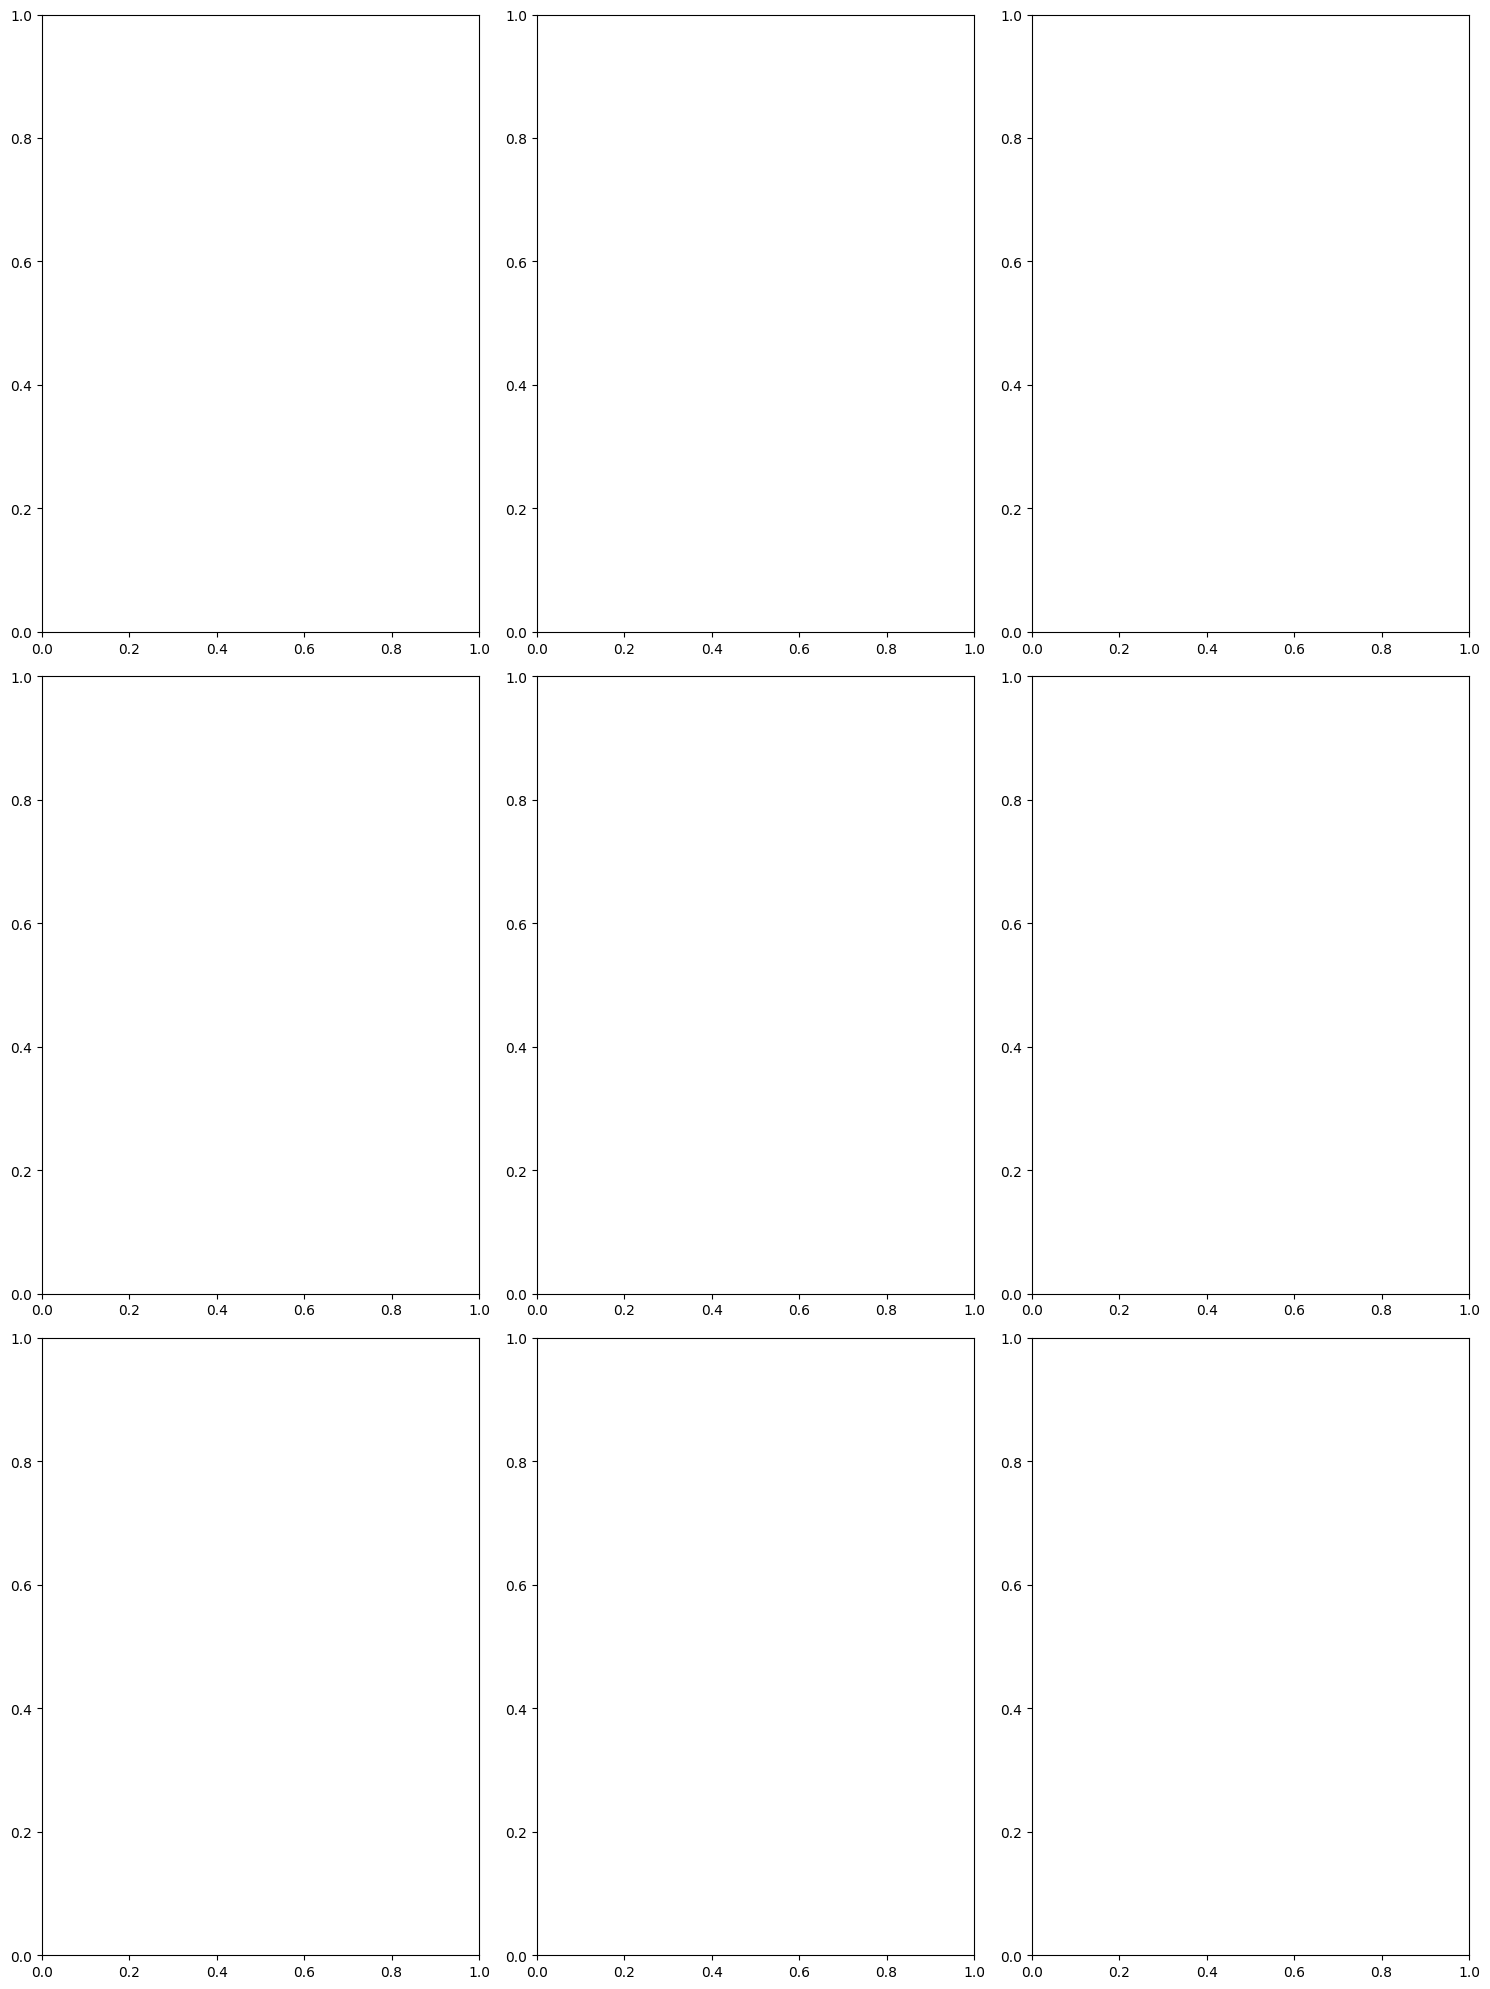

Processing edge 1201238829 -> 1201238872
Too short


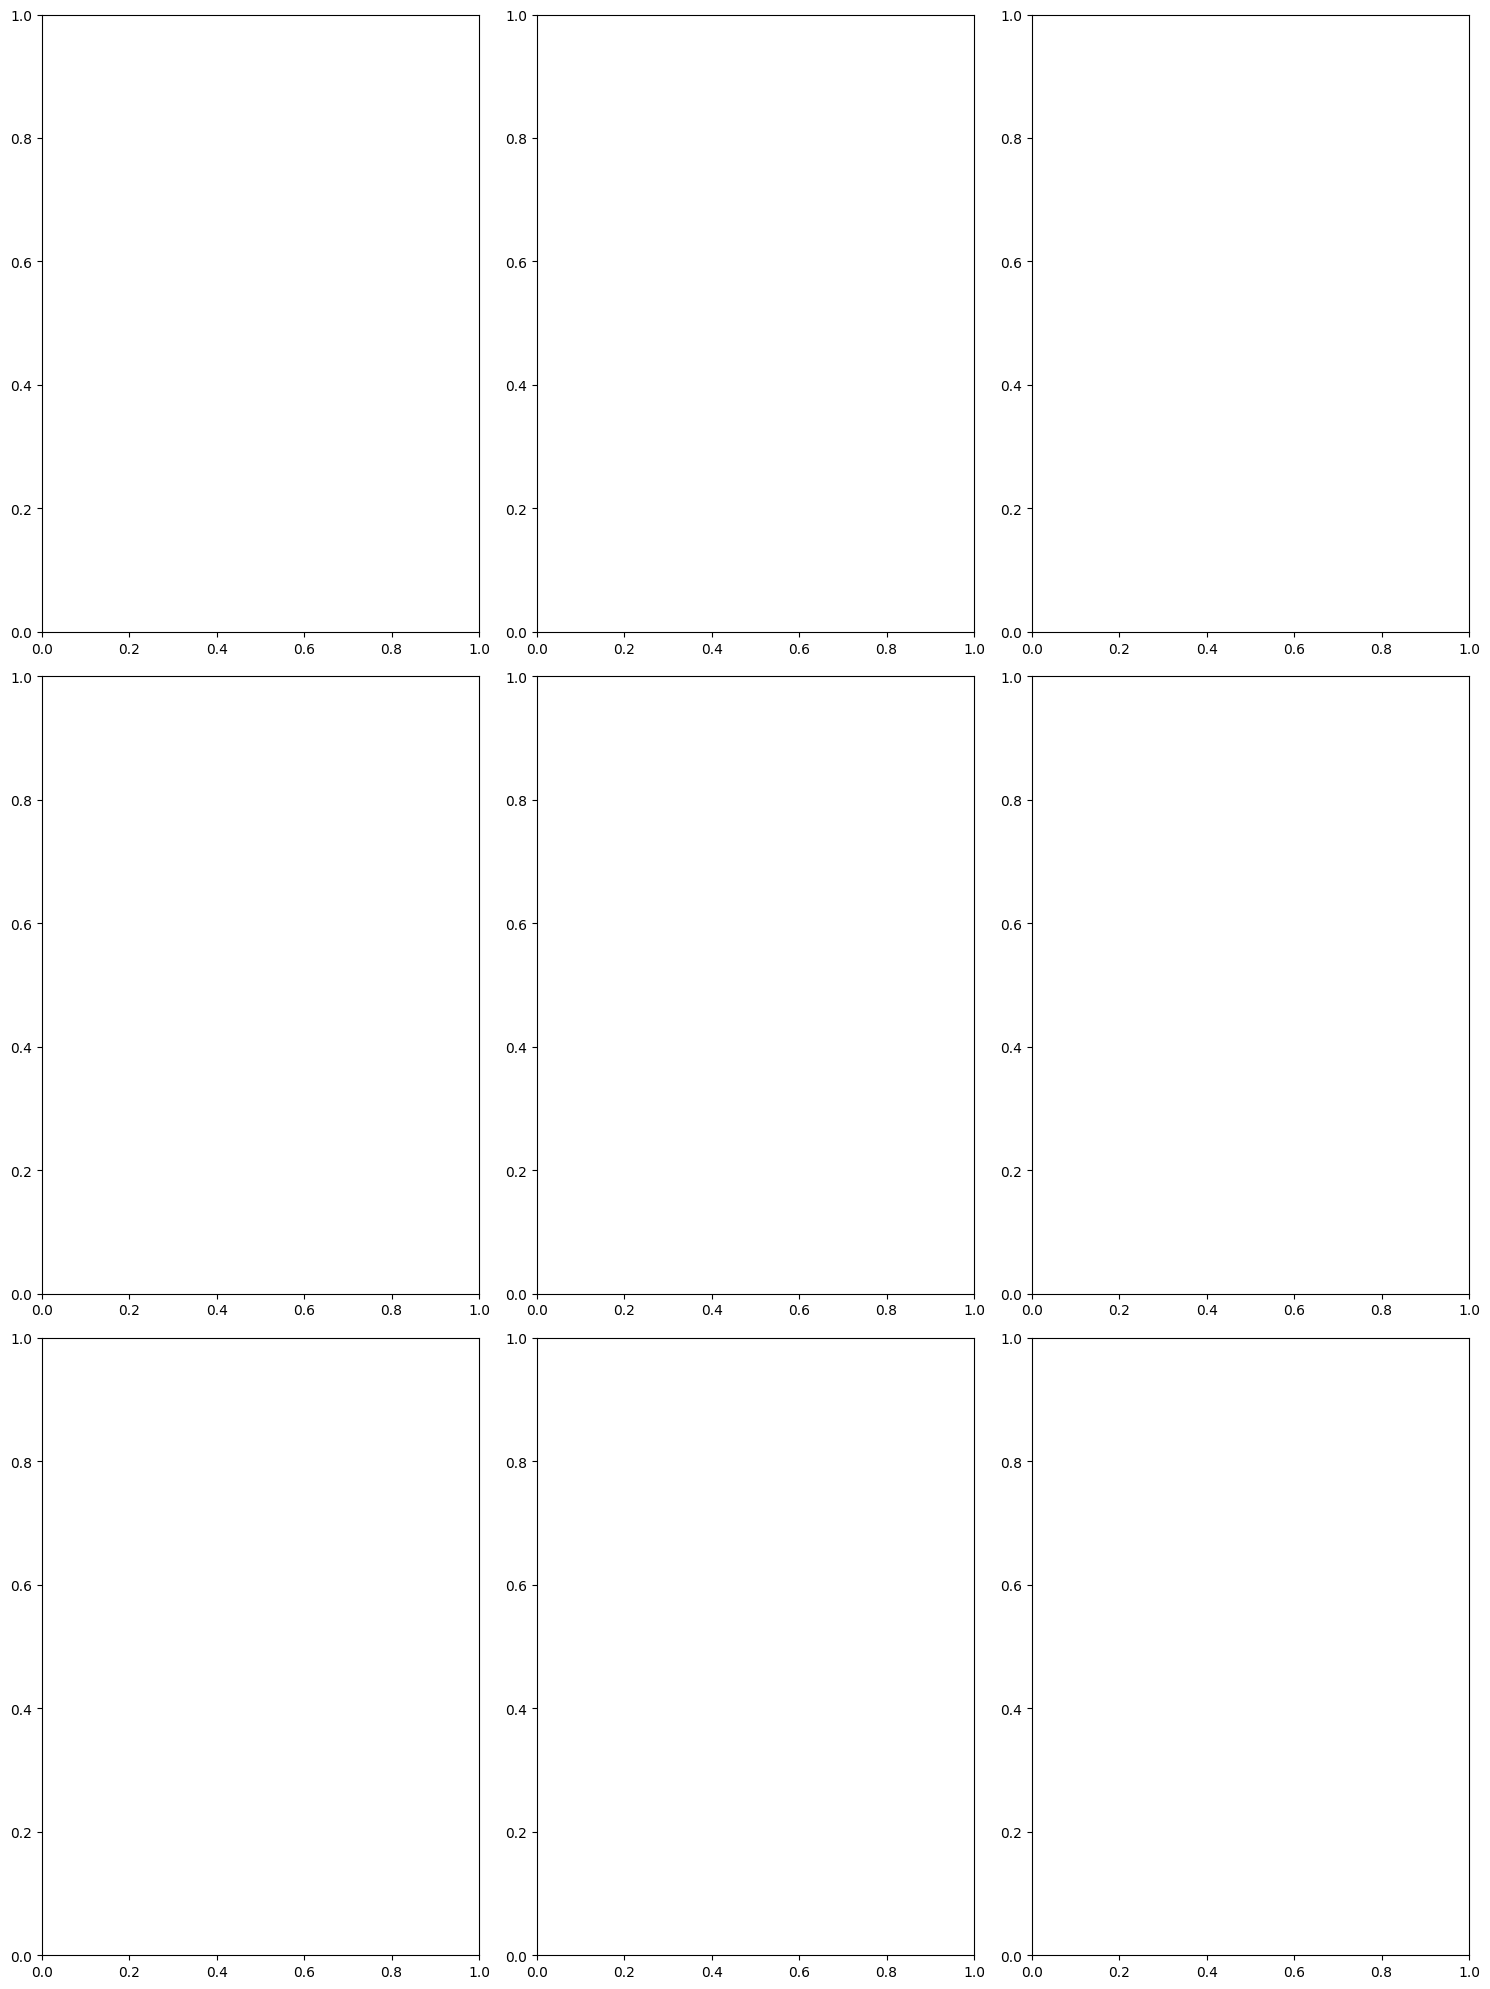

Processing edge 1201238872 -> 1489870813
Too short


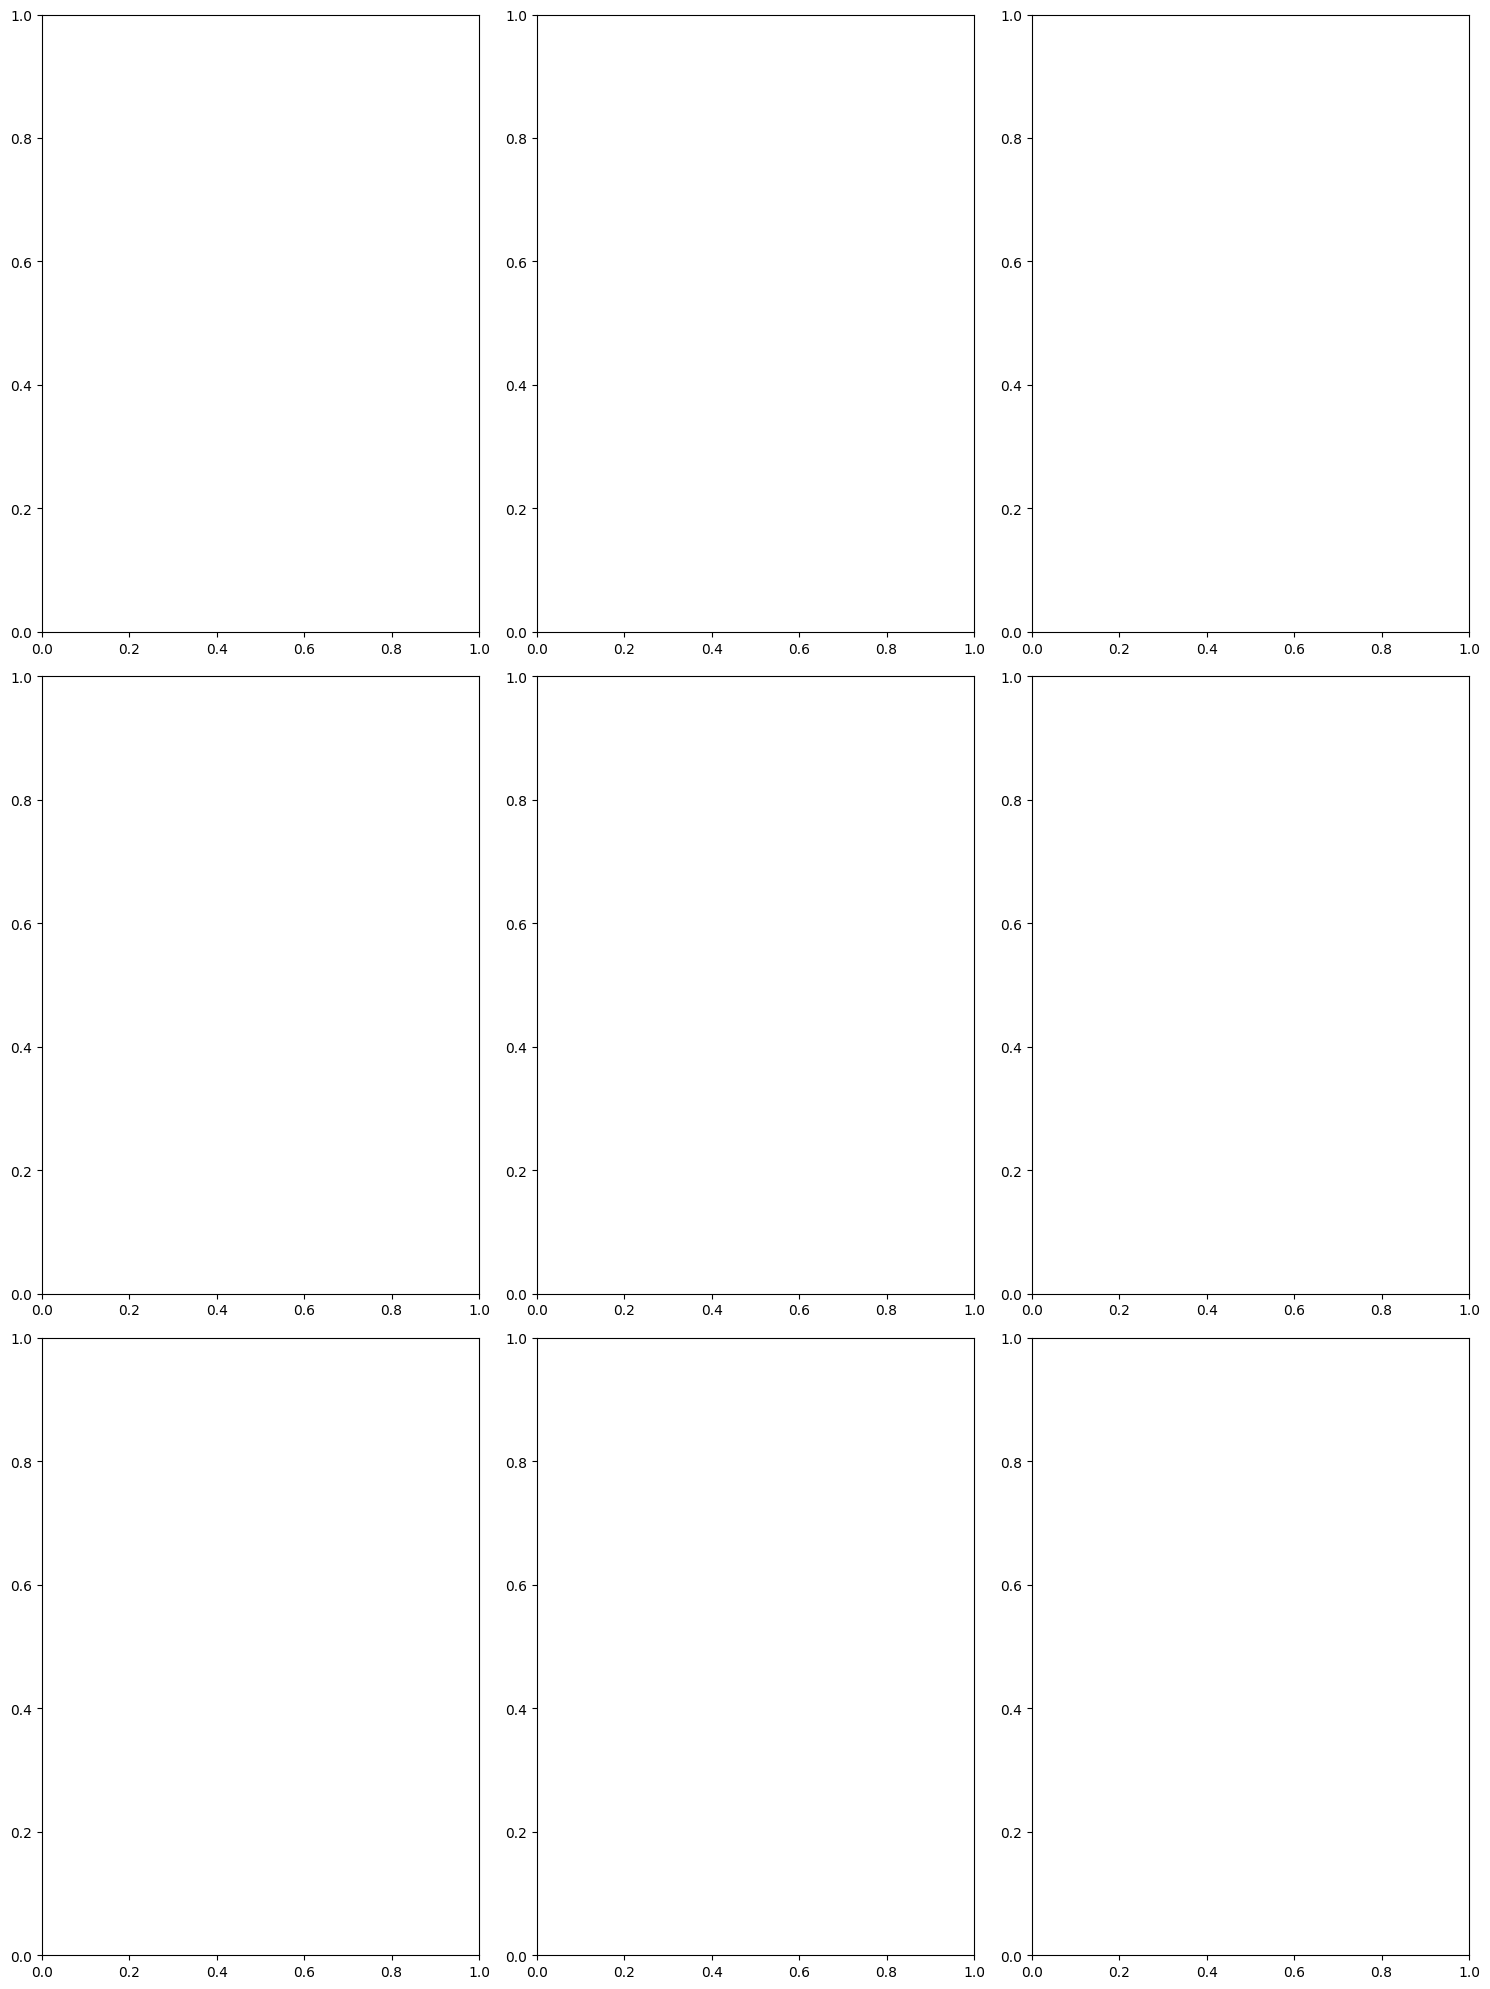

Processing edge 1489870813 -> 27237169
No valid stops found.


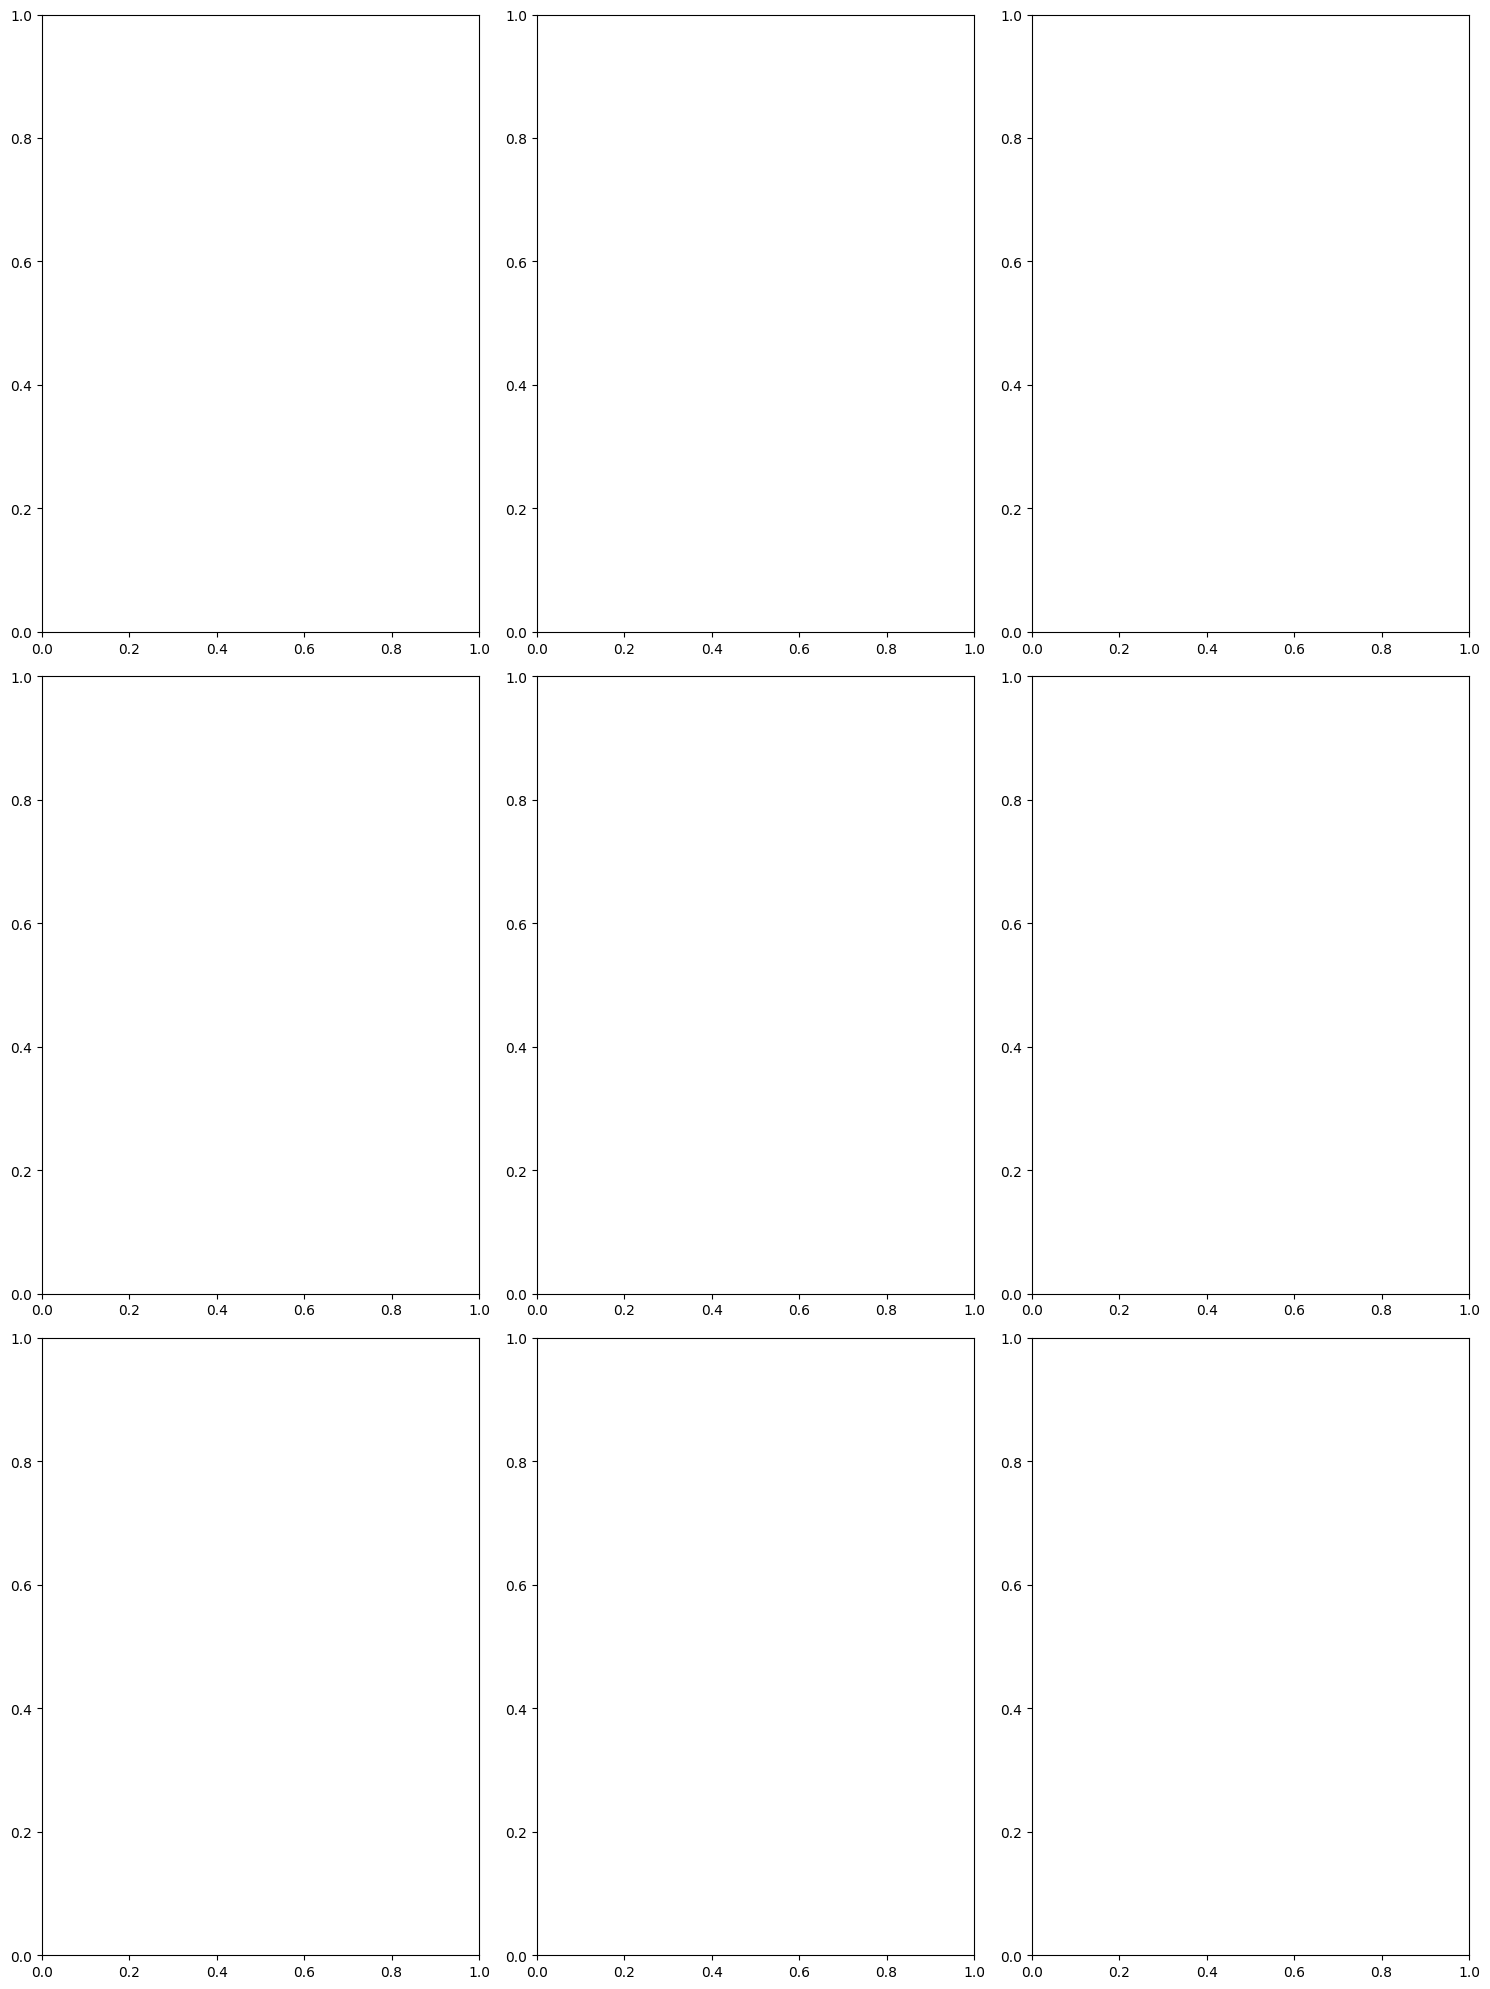

Processing edge 1489870813 -> 1014129863
No valid stops found.


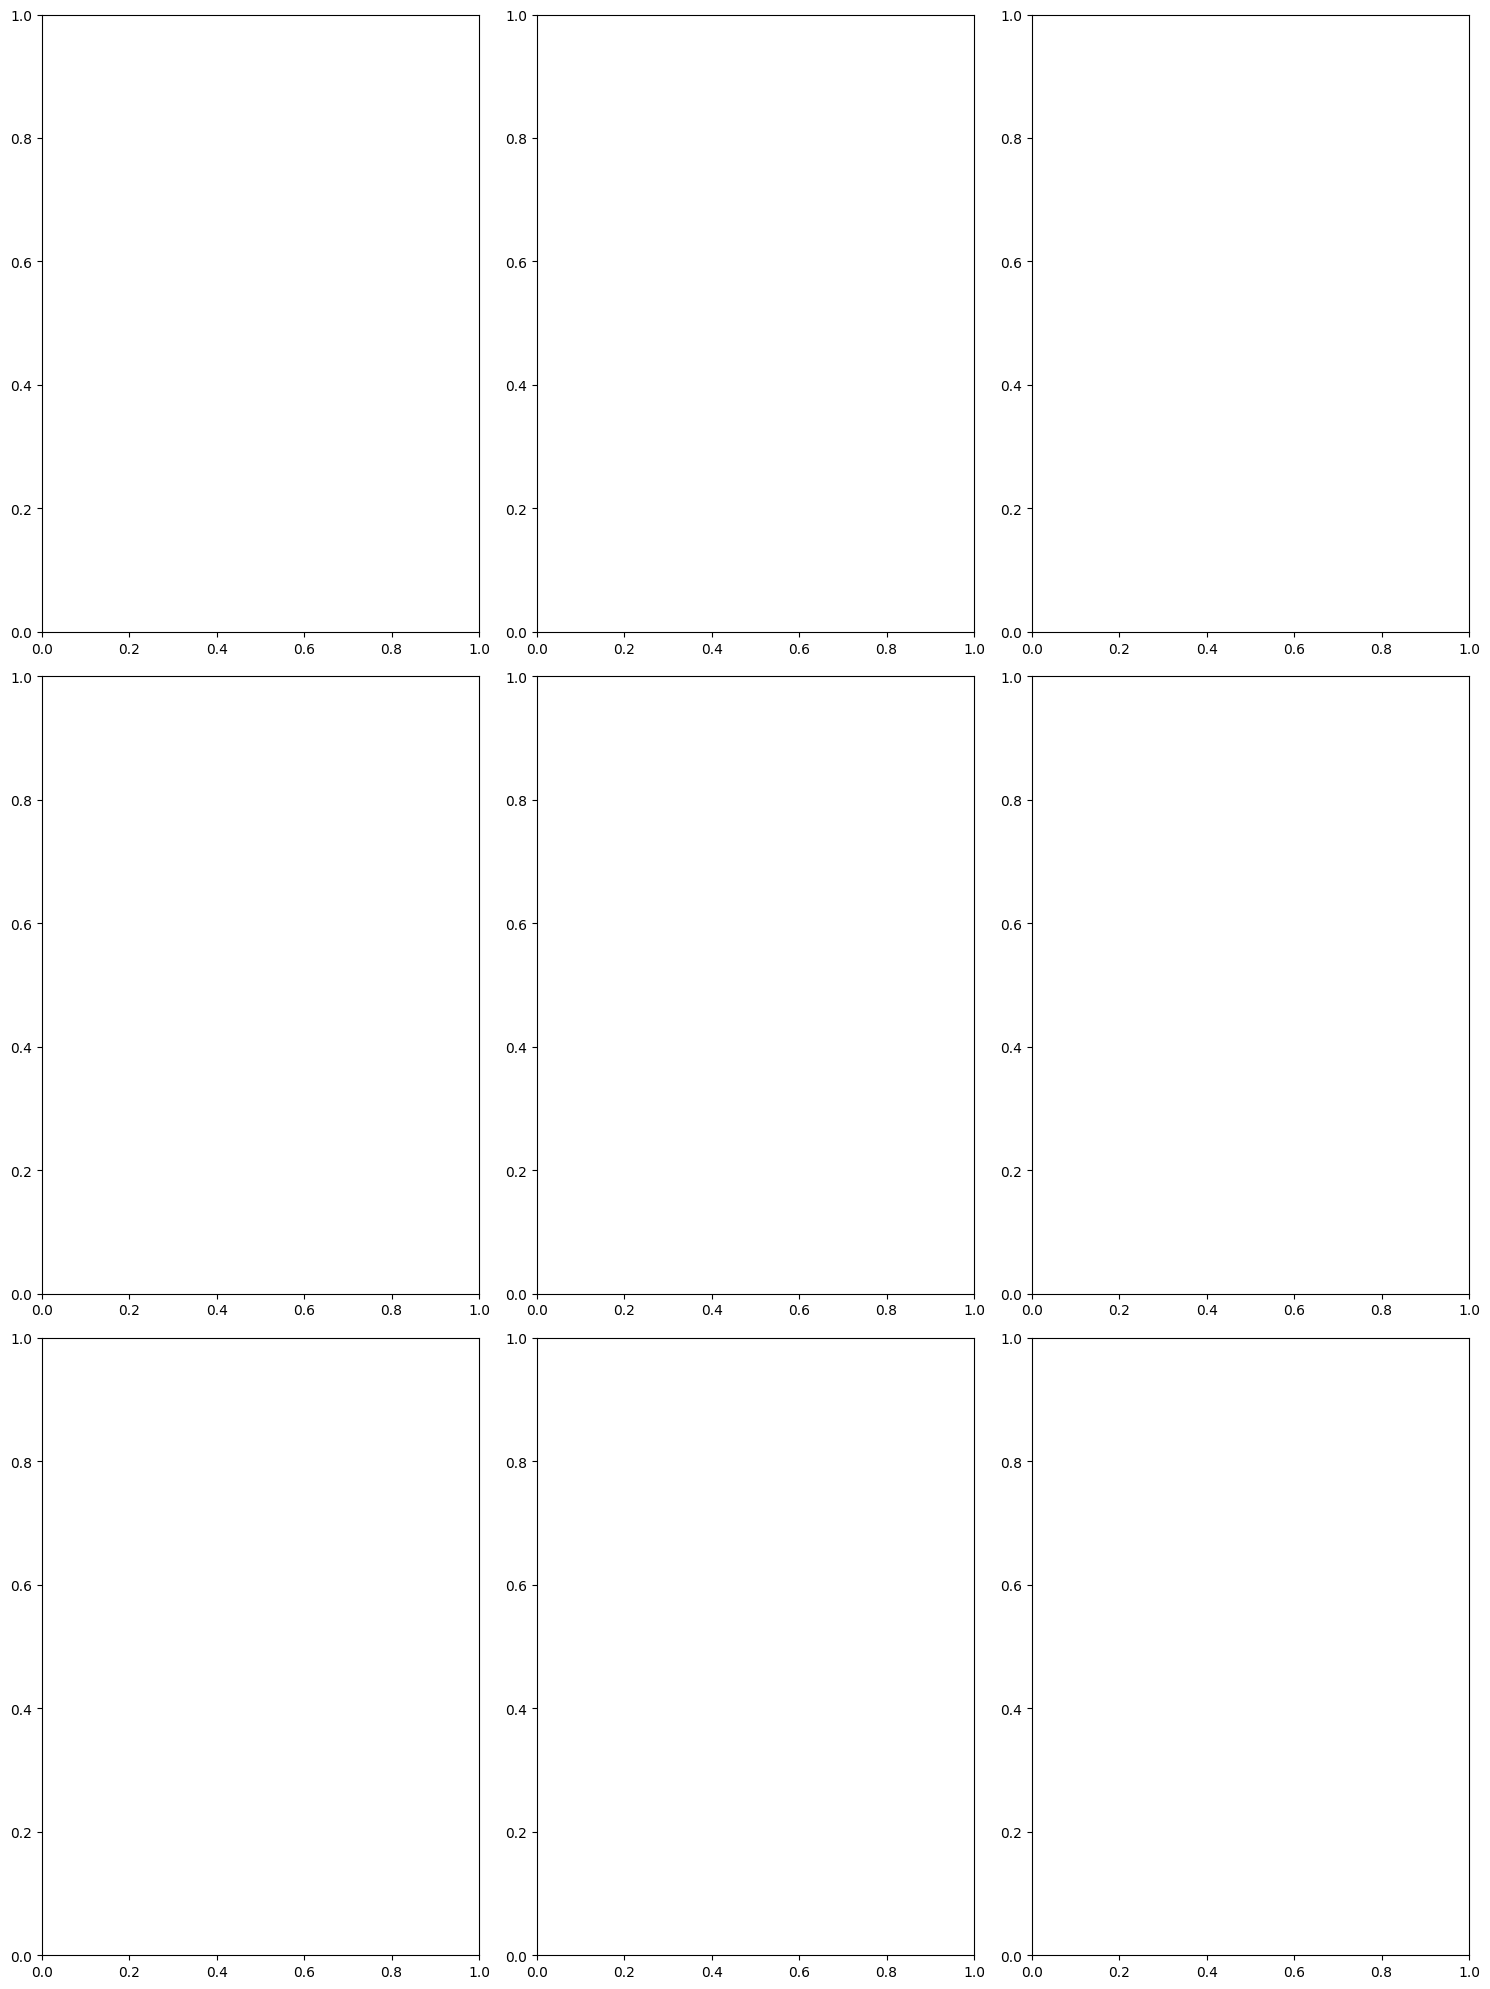

Processing edge 27237169 -> 34186922
Too short


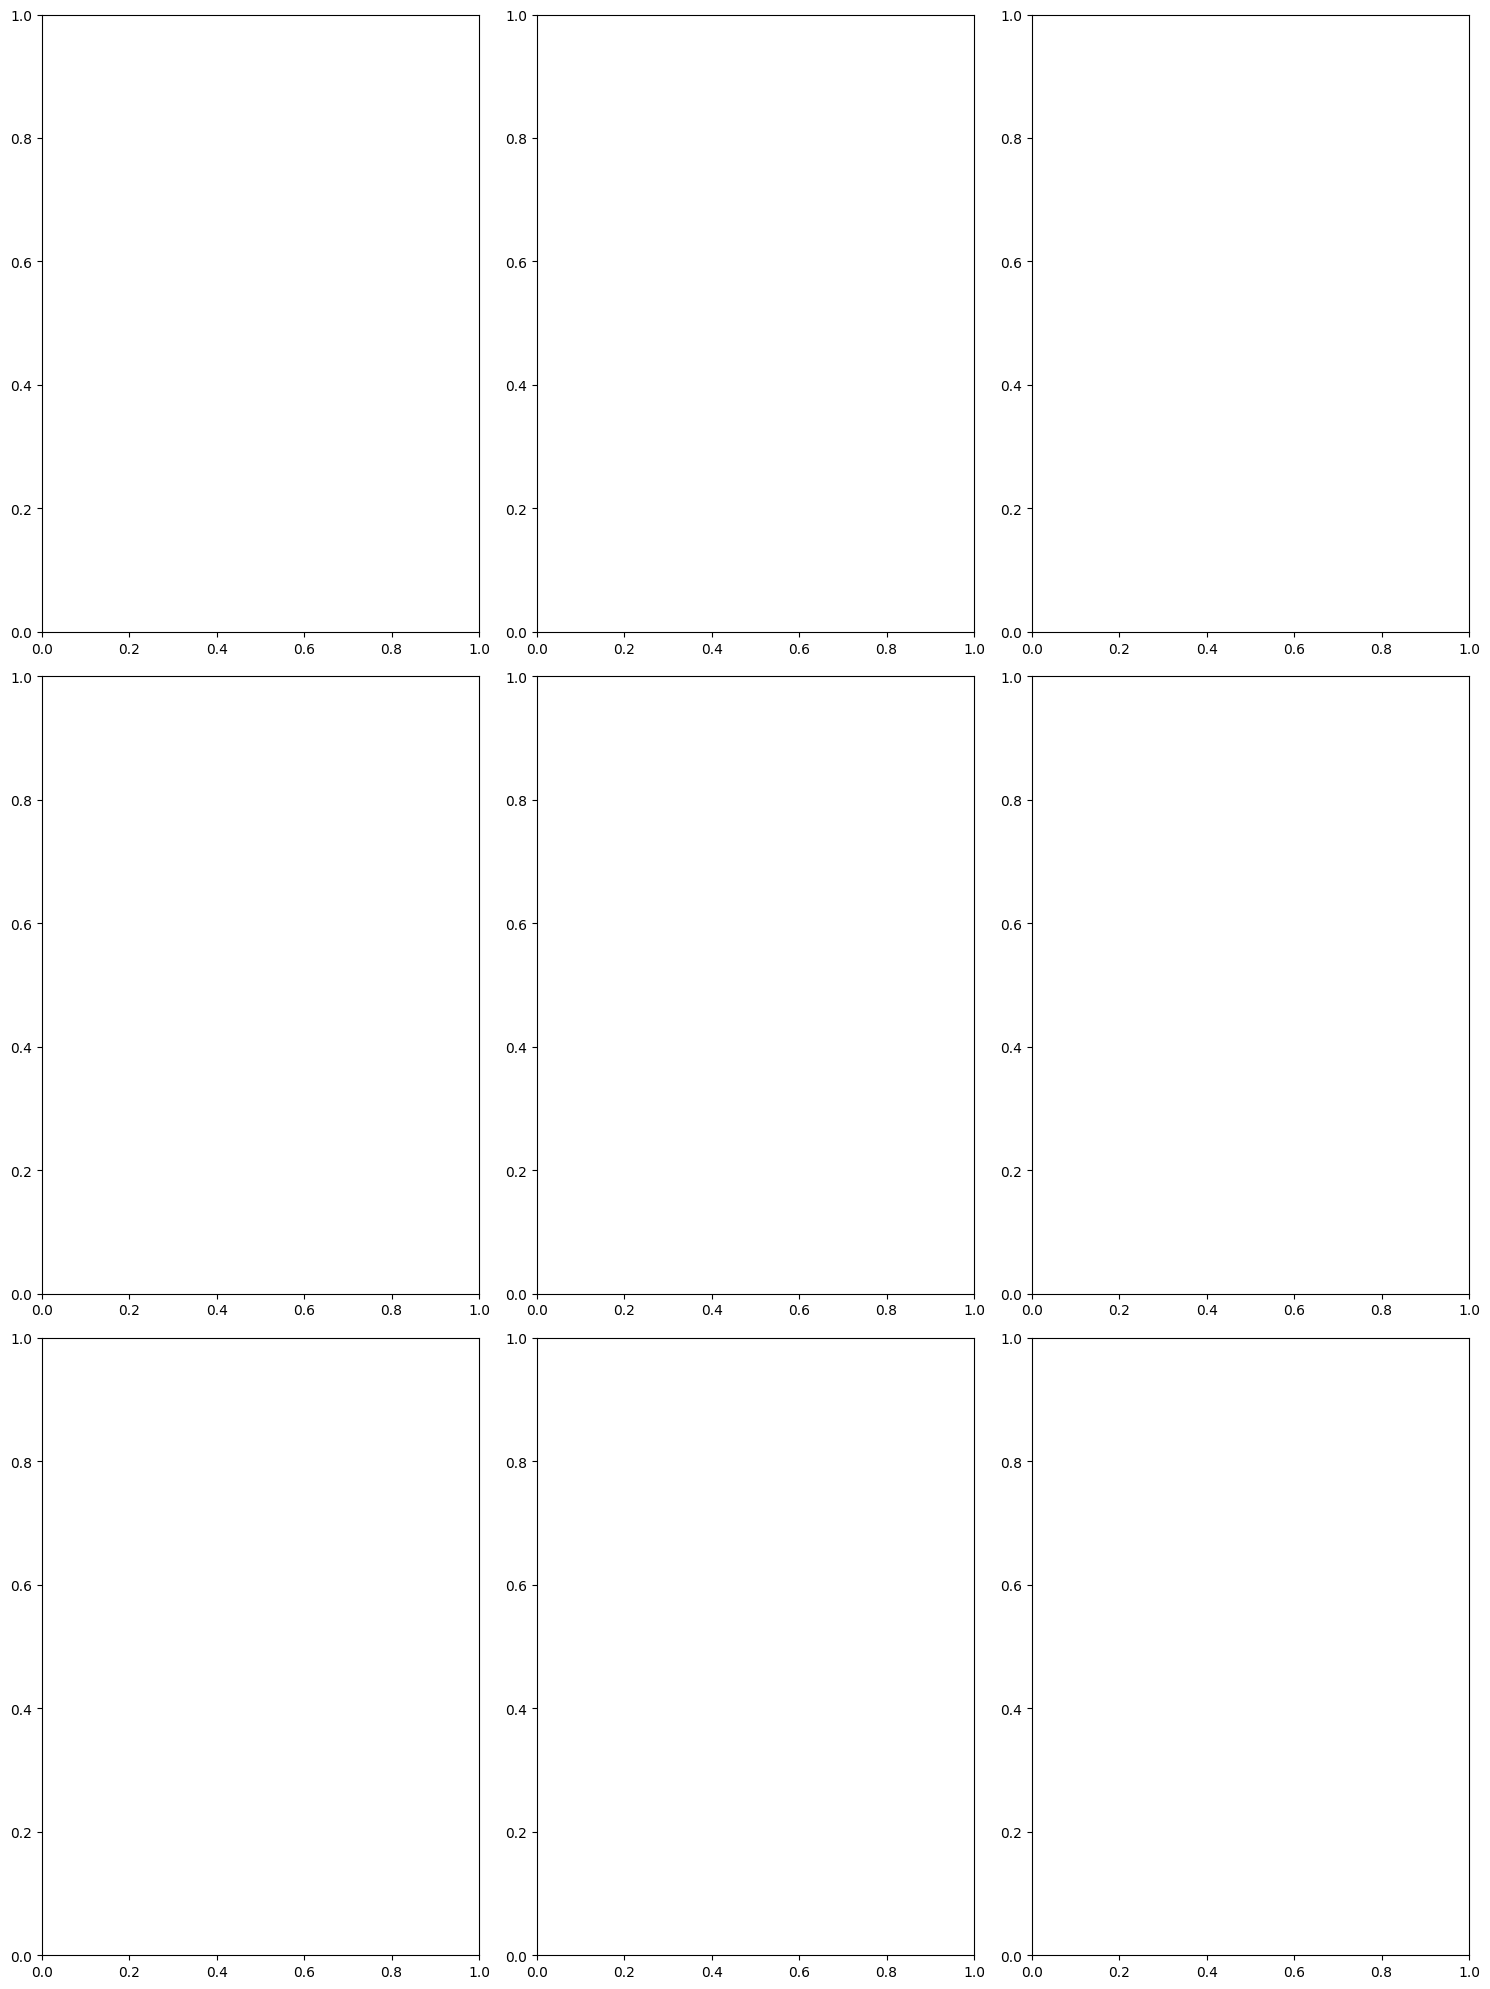

Processing edge 5048627590 -> 5048474491
Processing edge 4425983363 -> 5007537719
No valid stops found.


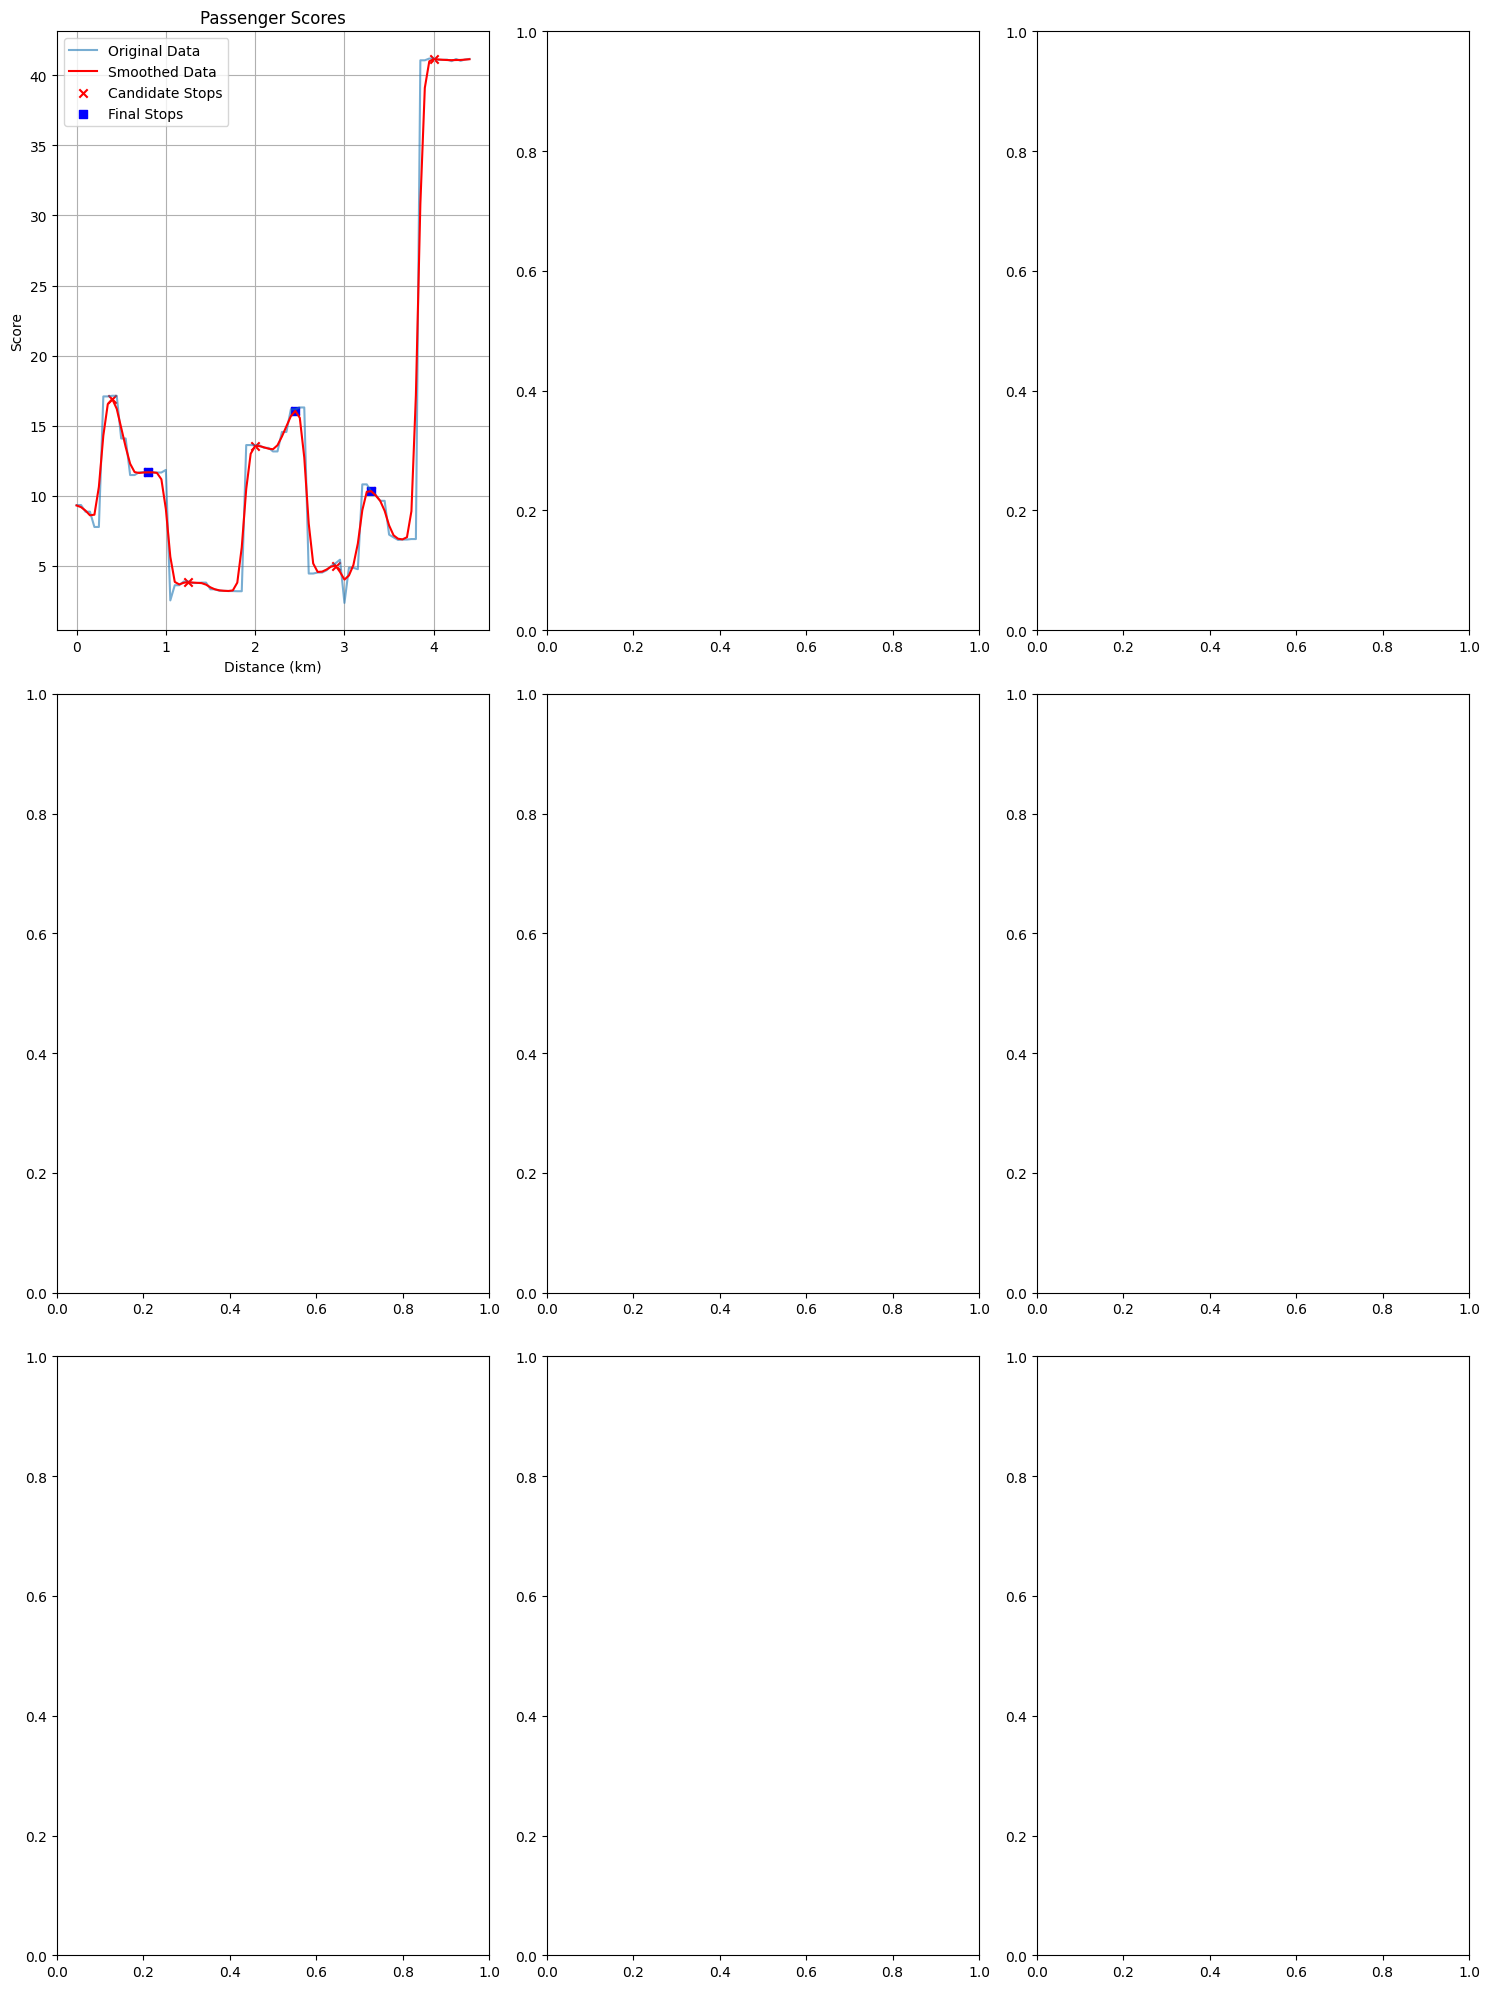

In [6]:
new_stops = {}
plot_row_n = 3  # Number of rows
plot_column_n = 3  # Number of columns
plots_per_block = plot_row_n * plot_column_n  # Total plots per block
index = 0

fig, axs = plt.subplots(plot_row_n, plot_column_n,
                        figsize=(25, 15))  # Adjust figure size
axs = axs.ravel()  # Flatten for easier indexing

for id_from, id_to, edge_data in G.edges(data=True):
    print(f"Processing edge {id_from} -> {id_to}")
    score_data = edge_data['score_data']
    extracted_data = [(value['distance_from_start'], value['scores']['final_score'])
                      for value in score_data]
    distances = [item[0] for item in extracted_data]
    scores = [item[1] for item in extracted_data]

    d = 0.8
    ax = axs[index % plots_per_block]  # Use modulus to cycle through axes
    stops = add_stops(np.array(distances), scores, min_distance=d,
                      score_threshold=1.0, min_length=2 * d, sigma=1, ax=ax)

    if stops:  # Only increment the index if something was drawn
        new_stops[(id_from, id_to)] = stops
        index += 1

    # If a block is filled, show the figure and create a new one
    if index % plots_per_block == 0 and index > 0:
        plt.tight_layout()
        plt.show()
        fig, axs = plt.subplots(plot_row_n, plot_column_n,
                                figsize=(15, 20))  # Create new figure
        axs = axs.ravel()

# Show the remaining plots if there are any
if index % plots_per_block != 0:
    plt.tight_layout()
    plt.show()

In [7]:
print(new_stops)
with open('../data/new_stops.json', 'w') as json_file:
    json.dump(new_stops, json_file, cls=CustomJSONEncoder)

{(1848219055, 602729079): [(1.850000000000001, 4.266348565285389), (2.7499999999999982, 1.26068753955372)], (602729079, 111465687): [(0.8000000000000002, 2.3444762741659595)], (2320789566, 1201238829): [(1.2000000000000004, 6.9928352943929175), (2.3499999999999996, 1.6483585180462348)], (2328470640, 1889922204): [(1.1000000000000003, 2.736809196925158)], (1896201758, 35786592): [(1.800000000000001, 1.207145164900105)], (534441279, 11142383860): [(1.3500000000000005, 1.3671054248073542)], (633181059, 35786587): [(1.900000000000001, 3.4012482340598784), (2.849999999999998, 8.432543029474356)], (1014753490, 12339218093): [(1.5500000000000007, 15.13174583834774)], (1225420655, 470330429): [(0.9000000000000002, 17.17013752852332)], (5902567606, 1229320617): [(1.5000000000000007, 2.7639999862128857)], (35786587, 27237169): [(2.1000000000000005, 25.325420148185803), (3.7999999999999945, 1.0057395968858607)], (1208295444, 59981798): [(1.7000000000000008, 1.229321168687108)], (59981798, 1206684